<a href="https://colab.research.google.com/github/ItayShkliar/Tennis_match_winner_predictor_ML/blob/main/Tennis_Atp_Project_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div dir = 'rtl'>

#<h1>חקירת משחקי טניס בטורנירי אייטיפי<h1>

---

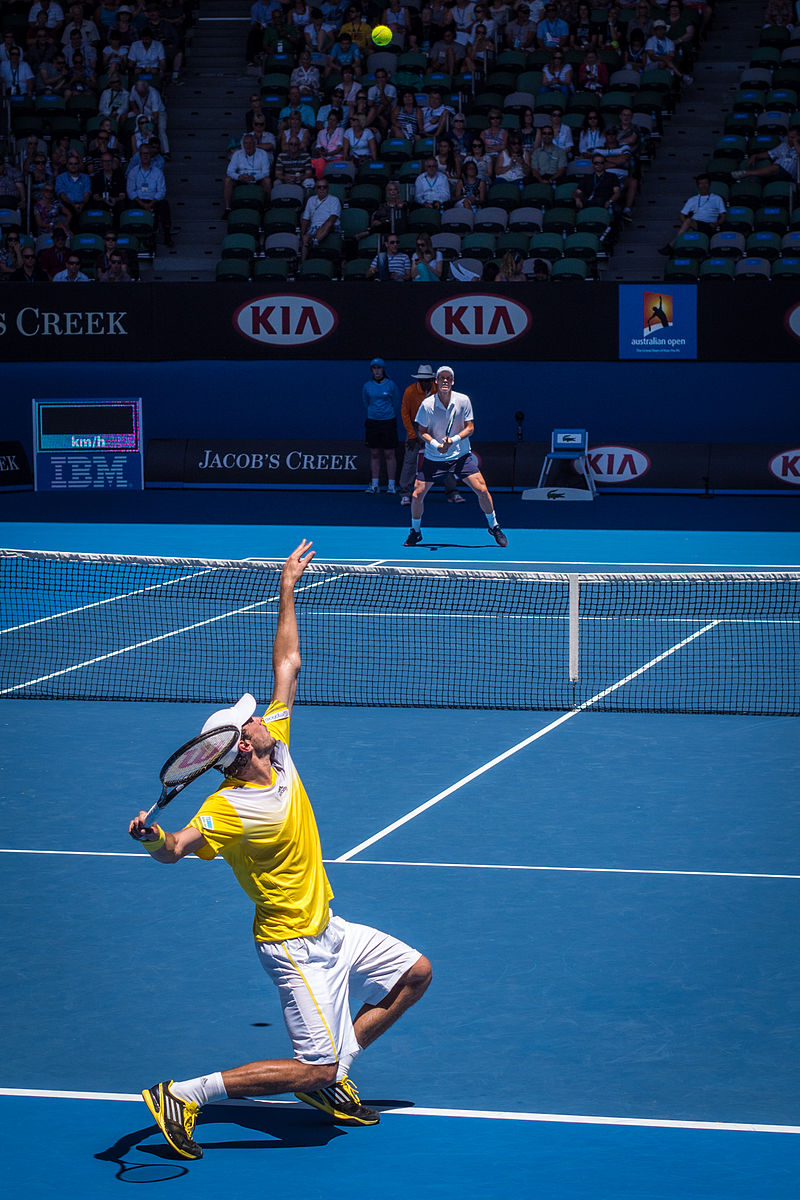

---
<div dir = 'rtl'>

##**שם המחקר:** טניס - ניצחון או הפסד


##**שם התלמיד:** איתי שקליאר


##**תאריך:** 17.5.24

---

##**מטרת המחקר:** לחזות ניצחון או הפסד במשחקי טניס לפי נתונים של משחקים

---

In [ ]:
!pip install -U kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 13.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<div dir = 'rtl'>

# נתונים


<div dir = 'rtl'>

## סקרייפינג לאתר atp tour

<div dir = 'rtl'>

סקרייפינג לאתר

https://www.atptour.com/

<div dir = 'rtl'>

פונקציות לעזר

⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇



```
from lxml import html
import requests
import re
import csv

def html_parse_tree(url):
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'}
    print(url)
    page = requests.get(url, headers = headers)
    returnCode = page.status_code
    tree = html.fromstring(page.content)
    return tree

def xpath_parse(tree, xpath):
    result = tree.xpath(xpath)
    return result

def regex_strip_array(array):
    for i in range(0, len(array)):
        array[i] = regex_strip_string(array[i]).strip()
    return array

def regex_strip_string(string):
    string = re.sub('\n', '', string).strip()
    string = re.sub('\r', '', string).strip()
    string = re.sub('\t', '', string).strip()
    return string

def format_spacing(max_spacing, variable):
    spacing_count = max_spacing - len(variable)
    output = ''
    for i in range(0, spacing_count):
        output += ' '
    return output

def fraction_stats(string):
    string = string.replace('(', '')
    string = string.replace(')', '')
    return string.split('/')

def add2csv(array, filename):
    with open(filename, 'a', newline = '') as csv_file:
        writer = csv.writer(csv_file)
        writer.writerow(array)


def array2csv(array, filename):
    with open(filename, "w+") as my_csv:
        csvWriter = csv.writer(my_csv, delimiter = ',')
        csvWriter.writerows(array)
```



<div dir = 'rtl'>

הקוד שמריץ הכל וקורא לפונקציות אחרות

⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇



```
import time
from selenium.webdriver.common.by import By
from match_stats_match_info import tourney_matches
from match_stats_tourney_list import tourneys
from match_data import *

# User selects year
tourney_year = input('\nEnter year: ')
tourneys_List = tourneys(tourney_year)

# User selects tournament
tourney_selected = input('\nEnter tourney number or enter 0 to get all matches for the year: ')
tourney_selected = int(tourney_selected)
print('')
if(tourney_selected > len(tourneys_List)):
    print("illegal number")
    exit(1)

if tourney_selected == 0:
    print(len(tourneys_List))
    tourney_start = input('\nEnter tourney number to start scraping for the year: ')
    tourney_start = int(tourney_start)
    if (tourney_start > len(tourneys_List)):
        print("illegal number")
        exit(1)
    currTourney = tourney_start
    tourney_index = currTourney - 1
    csv_filename = str(tourney_year)  + '.csv'
    tourney_start = tourney_start - 1
    tourneyCount = len(tourneys_List)
    for i in range(tourney_index, tourneyCount):
        print("TourneyNumber " + str(currTourney))
        tourney_matches_array = tourney_matches(tourneys_List[i], tourney_year)
        for match_info in tourney_matches_array:
            scrap_match_info(match_info, csv_filename)
        currTourney = currTourney + 1
else:
    tourney_index = int(tourney_selected) - 1
    tourney_matches_array = tourney_matches(tourneys_List[tourney_index], tourney_year)
    match_count = len(tourney_matches_array)
    print(match_count)
    for match_info in tourney_matches_array:
        print(str(match_info[0]) + ' - ' + match_info[2] + ' - ' + match_info[3] + ' - ' + match_info[4] + ' - ' + match_info[5] + ' ' + match_info[6])
    if (match_count > 0):
        # User selects match to start scraping
        match_selected = input('\nEnter match to start scraping: ')
        print('')
        match_index = int(match_selected) - 1

        for i in range (match_index, match_count):
            csv_filename = str(tourney_year) + '-' + str(tourney_selected) + '-' + str(match_selected) + '.csv'
            scrap_match_info(tourney_matches_array[i],csv_filename)

```



<div dir = 'rtl'>

 tourneys תחילה התוכנה מקבלת את השנה הרצויה מהמשתמש ואז לוקחת מידע באמצעות הפונקציה

 lxml requests הפונקציה משתמשת בספריות

 מהעמוד שיש בוא את כל התחרויות של שנה מסוימת

 דוגמא לקישור

 https://www.atptour.com/en/scores/results-archive?year=1999



```
from scraping import *

def tourneys(tourney_year):
    tourneys_List = []
    year = tourney_year

    # Setup
    year_url = "https://www.atptour.com/en/scores/results-archive?year=" + year
    url_prefix = "https://www.atptour.com"
    year_tree = html_parse_tree(year_url)

    # Tourney names
    tourney_name_xpath = "//span[contains(@class, 'name')]/text()"
    tourney_names = year_tree.xpath(tourney_name_xpath)
    tourney_count = len(tourney_names)

    # Tourney date
    tourney_date_xpath = "//span[contains(@class, 'Date')]/text()"
    tourney_dates = year_tree.xpath(tourney_date_xpath)
    print(len(tourney_dates))

    tourney_details_url_xpath = "//div[contains(@class, 'non-live-cta')]"
    tourney_url_suffixes = year_tree.xpath(tourney_details_url_xpath)
    print(len(tourney_url_suffixes))

    for i in range(0, tourney_count):

        tourney_order = i + 1

        if tourney_order < 10: spacing = ' '
        else: spacing = ''
        tourney_url_suffix = ''
        tourney_url_suffix_list = tourney_url_suffixes[i].xpath("a/@href")
        if len(tourney_url_suffix_list):
            tourney_url_suffix = tourney_url_suffix_list[0]

        print(spacing + str(tourney_order) + ' - ' + tourney_dates[i] + ' - ' + tourney_names[i] + ' - ' + tourney_url_suffix)
        tourneys_List.append([tourney_order,tourney_dates[i],tourney_names[i],tourney_url_suffix])
    return tourneys_List

```



<div dir = 'rtl'>

תוצאה לדוגמא

1 - 4 - 10 January, 1999 - Doha - /en/scores/archive/doha/451/1999/results

וכך לכל טורניר באותה שנה

לאחר מכן מקבלים את מספר הטורניר לסקרייפינג או את כל הטורנירים באותה שנה

וזה נעשה בעזרת פונקציה זאת

⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇



```
from scraping import *

def tourney_matches(tourneyInfo, tourney_year):

    url_prefix = "https://www.atptour.com"
    # Tourney info
    tourney_name = tourneyInfo[2]
    tourney_date = tourneyInfo[1]
    tourney_url_suffix = tourneyInfo[3]
    matches = []
    print(tourney_url_suffix)
    if(len(tourney_url_suffix) == 0):
        print("no matches")
    else:
        tourney_id = tourney_url_suffix.split('/')[5]
        tourney_url = url_prefix + tourney_url_suffix
        tourney_tree = html_parse_tree(tourney_url)
        # Tourney round count
        atp_accordion_item_xpath = "//div[contains(@class, 'atp_accordion-items')]/div[contains(@class, 'atp_accordion-item')]"
        atp_accordion_item_parsed = xpath_parse(tourney_tree, atp_accordion_item_xpath)
        tourney_round_count = len(atp_accordion_item_parsed)

        # Iterate through each round
        match_counter = 1
        for j in range(0, tourney_round_count):

            # Round order and match count
            round_order = j + 1
            atp_accordion_item = atp_accordion_item_parsed[j]
            round_name_xpath = "div[contains(@class, 'atp_accordion-header')]/div[contains(@class, 'tournament-day')]/h4/text()"
            round_name_list = atp_accordion_item.xpath(round_name_xpath)
            round_name = round_name_list[0]
            round_name = regex_strip_string(round_name)

            round_matches_xpath = "div[contains(@class, 'atp_accordion-content')]/div[contains(@class, 'match-group match-group--active')]/div[contains(@class, 'match-group-content')]/div[contains(@class, 'match')]"
            round_matches_list = atp_accordion_item.xpath(round_matches_xpath)
            round_match_count = len(round_matches_list)

            for k in range(0, round_match_count):

                # Match order and round match ID
                match_info = round_matches_list[k]
                match_round_name_xpath = "div[contains(@class, 'match-header')]/span/strong/text()"
                match_round_name_list = match_info.xpath(match_round_name_xpath)
                match_round_name = match_round_name_list[0]
                players_list_xpath =  "div[contains(@class, 'match-content')]/div[contains(@class, 'match-stats')]/div[contains(@class, 'stats-item')]/div[contains(@class, 'player-info')]/div[contains(@class, 'name')]/a/text()"
                players_list = match_info.xpath(players_list_xpath)
                players_count = len(players_list)
                player1 = players_list[0]
                player2 = players_list[1]
                print(player1)
                print(player2)
                tourney_id = " "
                match_index = " "
                match_stats_url = ""
                if(player1 != " Bye" and player2 != " Bye"):
                    match_url_xpath = "div[contains(@class, 'match-footer')]/div[contains(@class, 'match-cta')]/a"
                    match_urls = match_info.xpath(match_url_xpath)
                    print(len(match_urls))
                    for match_url in match_urls:
                        if(match_url.text == "Match Stats"):
                            match_stats_url = match_url.attrib["href"]
                            print(match_stats_url)
                            match_index = match_stats_url.split('/')[7]
                            tourney_id = match_stats_url.split('/')[6]

                match_id = tourney_year + "-" + tourney_id + "-" + match_index;
                match_info = [match_counter,  tourney_name, match_id, match_round_name, player1, player2, match_stats_url]
                matches.append(match_info)
                match_counter += 1

    return matches
```



<div dir = 'rtl'>

לאחר שיש את הקישורים של כל המשחקים בטורניר

המשתמש מכניס את המשחק שרוצה או מכניס שהוא רוצה את כולם ומקבל קובץ של כל הנתונים של המשחקים

נעשה בעזרת

chromedriver , selenium

 כרום דרייבר הוא תוכנה המאפשרת בדיקות אוטומטיות ואינטראקציה עם גוגל כרום

⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇




```
import time
import sys

from selenium import webdriver
from selenium.webdriver.common.by import By
from scraping import add2csv
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import requests

def getIntValuePlayer1(playItem):
    elem = playItem.find_element(By.XPATH, "div[contains(@class, 'player-stats-item')]/div[contains(@class, 'value')]")
    v = int(elem.text)
    return v

def getIntValuePlayer2(playItem):
    elem = playItem.find_element(By.XPATH, "div[contains(@class, 'opponent-stats-item')]/div[contains(@class, 'value')]")
    v = int(elem.text)
    return v

def getStringValuePlayer1(playItem):
    elem = playItem.find_element(By.XPATH, "div[contains(@class, 'player-stats-item')]/div[contains(@class, 'value')]")
    return elem.text

def fill_three_data(playDataInput, playDataOutput):
    percent_part = playDataInput.split("%")[0]
    percentData = int(percent_part)
    value1 = playDataInput.split("(")[1]
    temp = value1.split(")")[0]
    value1 = temp.split("/")[0]
    value2 = temp.split("/")[1]
    playDataOutput[0] = percentData
    playDataOutput[1] = value1
    playDataOutput[2] = value2

def getStringValuePlayer2(playItem):
    elem = playItem.find_element(By.XPATH, "div[contains(@class, 'opponent-stats-item')]/div[contains(@class, 'value')]")
    return elem.text
def scrapServiceStatsInfo(groupItems,csv_row_data):
    scrapService_Stats = []
    player1_serve_raiting = 0
    player2_serve_raiting = 0
    aces1 = 0
    aces2  = 0
    doubleFaults1 = 0
    doubleFaults2 = 0
    firstServe1Data = [0, 0, 0]
    firstServe2Data = [0, 0, 0]
    firstServePointWon1Data = [0, 0, 0]
    firstServePointWon2Data = [0, 0, 0]
    secondServePointWon1Data = [0, 0, 0]
    secondServePointWon2Data = [0, 0, 0]
    breakPointSaved1Data = [0, 0, 0]
    breakPointSaved2Data = [0, 0, 0]
    player1_service_games_played = 0
    player2_service_games_played = 0

    try:
        groupsElements_li = groupItems.find_elements(By.XPATH, "ul/li")
        print(len(groupsElements_li))
        for li in groupsElements_li:
            di = li.find_element(By.XPATH, "div[contains(@class, 'stats-item-legend')]")
            print(di.text)
            if('Serve Rating' ==  di.text):
                player1_serve_raiting = getIntValuePlayer1(li)
                player2_serve_raiting = getIntValuePlayer2(li)
            if ('Aces'== di.text):
                aces1 = getIntValuePlayer1(li)
                aces2 = getIntValuePlayer2(li)
            if ('Double Faults' == di.text):
                doubleFaults1 = getIntValuePlayer1(li)
                doubleFaults2 = getIntValuePlayer2(li)
            if ('1st Serve' ==  di.text):
                firstServe1 = getStringValuePlayer1(li)
                firstServe2 = getStringValuePlayer2(li)
                fill_three_data(firstServe1, firstServe1Data)
                fill_three_data(firstServe2, firstServe2Data)
            if ('1st Serve Points Won' ==  di.text):
                firstServePointWon1 = getStringValuePlayer1(li)
                firstServePointWon2 = getStringValuePlayer2(li)
                fill_three_data(firstServePointWon1, firstServePointWon1Data)
                fill_three_data(firstServePointWon2, firstServePointWon2Data)
            if ('2nd Serve Points Won' ==  di.text):
                secondServePointWon1 = getStringValuePlayer1(li)
                secondServePointWon2 = getStringValuePlayer2(li)
                fill_three_data(secondServePointWon1, secondServePointWon1Data)
                fill_three_data(secondServePointWon2, secondServePointWon2Data)
            if ('Break Points Saved' ==  di.text):
                breakPointSaved1 = getStringValuePlayer1(li)
                breakPointSaved2 = getStringValuePlayer2(li)
                fill_three_data(breakPointSaved1, breakPointSaved1Data)
                fill_three_data(breakPointSaved2, breakPointSaved2Data)
            if ('Service Games Played' == di.text):
                player1_service_games_played = getIntValuePlayer1(li)
                player2_service_games_played = getIntValuePlayer2(li)

    except NoSuchElementException:
        print("element not found")

    scrapService_Stats.append(player1_serve_raiting)
    scrapService_Stats.append(player2_serve_raiting)
    scrapService_Stats.append(aces1)
    scrapService_Stats.append(aces2)
    scrapService_Stats.append(doubleFaults1)
    scrapService_Stats.append(doubleFaults2)
    scrapService_Stats = scrapService_Stats + firstServe1Data
    scrapService_Stats = scrapService_Stats + firstServe2Data
    scrapService_Stats = scrapService_Stats + firstServePointWon1Data
    scrapService_Stats = scrapService_Stats + firstServePointWon2Data
    scrapService_Stats = scrapService_Stats + secondServePointWon1Data
    scrapService_Stats = scrapService_Stats + secondServePointWon2Data
    scrapService_Stats = scrapService_Stats + breakPointSaved1Data
    scrapService_Stats = scrapService_Stats + breakPointSaved2Data
    scrapService_Stats.append(player1_service_games_played)
    scrapService_Stats.append(player2_service_games_played)

    print(scrapService_Stats)

    return scrapService_Stats

def scrapReturnStatsInfo(groupItems,csv_row_data):
    scrapReturn_Stats = []
    player1_return_rating = 0
    player2_return_rating = 0
    firstServeReturnPointWon1Data = [0, 0, 0]
    firstServeReturnPointWon2Data = [0, 0, 0]
    secondServeReturnPointWon1Data = [0, 0, 0]
    secondServeReturnPointWon2Data = [0, 0, 0]
    break_Points_Converted1Data = [0, 0, 0]
    break_Points_Converted2Data = [0, 0, 0]
    player1_return_games_played = 0
    player2_return_games_played = 0
    try:
        groupsElements_li = groupItems.find_elements(By.XPATH, "ul/li")
        print(len(groupsElements_li))
        for li in groupsElements_li:
            di = li.find_element(By.XPATH, "div[contains(@class, 'stats-item-legend')]")
            print(di.text)
            if ('Return Rating' == di.text):
                player1_return_rating = getIntValuePlayer1(li)
                player2_return_rating = getIntValuePlayer2(li)
            if ('1st Serve Return Points Won' == di.text):
                firstServeReturnPointWon1 = getStringValuePlayer1(li)
                firstServeReturnPointWon2 = getStringValuePlayer2(li)
                fill_three_data(firstServeReturnPointWon1, firstServeReturnPointWon1Data)
                fill_three_data(firstServeReturnPointWon2, firstServeReturnPointWon2Data)
            if ('2nd Serve Return Points Won' == di.text):
                secondServeReturnPointWon1 = getStringValuePlayer1(li)
                secondServeReturnPointWon2 = getStringValuePlayer2(li)
                fill_three_data(secondServeReturnPointWon1, secondServeReturnPointWon1Data)
                fill_three_data(secondServeReturnPointWon2, secondServeReturnPointWon2Data)
            if ('Break Points Converted' == di.text):
                break_Points_Converted1 = getStringValuePlayer1(li)
                break_Points_Converted2 = getStringValuePlayer2(li)
                fill_three_data(break_Points_Converted1, break_Points_Converted1Data)
                fill_three_data(break_Points_Converted2, break_Points_Converted2Data)
            if ('Return Games Played' == di.text):
                player1_return_games_played = getIntValuePlayer1(li)
                player2_return_games_played = getIntValuePlayer2(li)


    except NoSuchElementException:
        print("element not found")

    scrapReturn_Stats.append(player1_return_rating)
    scrapReturn_Stats.append(player2_return_rating)
    scrapReturn_Stats = scrapReturn_Stats + firstServeReturnPointWon1Data
    scrapReturn_Stats = scrapReturn_Stats + firstServeReturnPointWon2Data
    scrapReturn_Stats = scrapReturn_Stats + secondServeReturnPointWon1Data
    scrapReturn_Stats = scrapReturn_Stats + secondServeReturnPointWon2Data
    scrapReturn_Stats = scrapReturn_Stats + break_Points_Converted1Data
    scrapReturn_Stats = scrapReturn_Stats + break_Points_Converted2Data
    scrapReturn_Stats.append(player1_return_games_played)
    scrapReturn_Stats.append(player2_return_games_played)


    print(scrapReturn_Stats)


    return scrapReturn_Stats

def scrapPointStatsInfo(groupItems,csv_row_data):
    scrapPoint_Stats = []
    servicePointsWon1Data = [0, 0, 0]
    servicePointsWon2Data = [0, 0, 0]
    returnPointWon1Data = [0, 0, 0]
    returnPointWon2Data = [0, 0, 0]
    total_Points_Won1Data = [0, 0, 0]
    total_Points_Won2Data = [0, 0, 0]
    try:
        groupsElements_li = groupItems.find_elements(By.XPATH, "ul/li")
        print(len(groupsElements_li))
        for li in groupsElements_li:
            di = li.find_element(By.XPATH, "div[contains(@class, 'stats-item-legend')]")
            print(di.text)
            if ('Service Points Won' == di.text):
                servicePointsWon1 = getStringValuePlayer1(li)
                servicePointsWon2 = getStringValuePlayer2(li)
                fill_three_data(servicePointsWon1, servicePointsWon1Data)
                fill_three_data(servicePointsWon2, servicePointsWon2Data)
            if ('Return Points Won' == di.text):
                returnPointWon1 = getStringValuePlayer1(li)
                returnPointWon2 = getStringValuePlayer2(li)
                fill_three_data(returnPointWon1, returnPointWon1Data)
                fill_three_data(returnPointWon2, returnPointWon2Data)
            if ('Total Points Won' == di.text):
                total_Points_Won1 = getStringValuePlayer1(li)
                total_Points_Won2 = getStringValuePlayer2(li)
                fill_three_data(total_Points_Won1, total_Points_Won1Data)
                fill_three_data(total_Points_Won2, total_Points_Won2Data)



    except NoSuchElementException:
        print("element not found")


    scrapPoint_Stats = scrapPoint_Stats + servicePointsWon1Data
    scrapPoint_Stats = scrapPoint_Stats + servicePointsWon2Data
    scrapPoint_Stats = scrapPoint_Stats + returnPointWon1Data
    scrapPoint_Stats = scrapPoint_Stats + returnPointWon2Data
    scrapPoint_Stats = scrapPoint_Stats + total_Points_Won1Data
    scrapPoint_Stats = scrapPoint_Stats + total_Points_Won2Data

    print(scrapPoint_Stats)

    return scrapPoint_Stats

def scrap_match_info(match_info, csv_filename):
    url_prefix = 'https://www.atptour.com'

    match_id = match_info[2]
    match_stats_url_suffix = match_info[6]
    match_stats_url = url_prefix + match_stats_url_suffix
    player1 = match_info[4]
    player2 = match_info[5]
    tourneyName = match_info[1]
    roundName = match_info[3]

    if(match_stats_url_suffix != ""):

        print(csv_filename)
        driver = webdriver.Chrome()
        driver.get(match_stats_url)
        html = driver.page_source
        time.sleep(6)
        try:
            body = driver.find_element(By.TAG_NAME, "body")

            print(body)

            original_stdout = sys.stdout
            filename  = "_body.txt";
            with open(filename, "w", encoding="utf-8") as f:
                sys.stdout = f
                print(body.text)

            sys.stdout = original_stdout

            isExternal = driver.find_element(By.XPATH, "//input[contains(@class, 'atp_matchstats-isExternal')]")
            print(isExternal)
            isExterlalValue  = isExternal.get_attribute("value")
            print(isExterlalValue)
            if("false" == isExterlalValue):
                elementStatsInternal = driver.find_element(By.XPATH, "//div[contains(@class, 'stats-internal stas-internal--match')]")

                stats_group_elements = elementStatsInternal.find_elements(By.XPATH, "div[contains(@class, 'stats-group')]")
                csv_row_data = [match_id, tourneyName, roundName, match_stats_url, player1, player2]
                print(len(stats_group_elements))
                for stats_group_element in stats_group_elements:
                    groupName = stats_group_element.find_element(By.XPATH, "div[contains(@class, 'stats-group-title')]")
                    text_value = groupName.text.strip()  # Get text and remove leading/trailing whitespace
                    if text_value:  # Check if there's actual text content (optional)
                        print(text_value)
                        groupItems = stats_group_element.find_element(By.XPATH, "div[contains(@class, 'stats-group-items')]")
                        if(text_value == "SERVICE STATS"):
                            scrapService_Stats = scrapServiceStatsInfo(groupItems,csv_row_data)
                        if(text_value == "RETURN STATS"):
                            scrapReturn_Stats1 = scrapReturnStatsInfo(groupItems,csv_row_data)
                        if (text_value == "POINT STATS"):
                            scrapPoint_Stats = scrapPointStatsInfo(groupItems, csv_row_data)

                csv_row_data = csv_row_data + scrapService_Stats
                csv_row_data = csv_row_data + scrapReturn_Stats1
                csv_row_data = csv_row_data + scrapPoint_Stats

                add2csv(csv_row_data, csv_filename)


        except NoSuchElementException:
            print("element not found")


```



<div dir = 'rtl'>

##תיאור נתונים ראשוניים

<div dir = 'rtl'>

match_id - מזהה המשחק: מספר ייחודי לזיהוי המשחק

tourney_slug - קוד הטורניר: מזהה את הטורניר בו התקיים המשחק

match_stats_url_suffix - סיומת כתובת URL של סטטיסטיקות המשחק: הקישור לסטטיסטיקות המלאות של המשחק

match_time - זמן המשחק: תאריך ושעת תחילת המשחק

match_duration - משך המשחק: משך הזמן שבו התקיים המשחק

winner_slug - זיהוי המנצח: מזהה את השחקן שזכה במשחק

winner_serve_rating - דירוג ההגשה של המנצח: מדד של איכות ההגשה של המנצח

winner_aces - אייסים של המנצח: מספר האייסים (נקודות ישרות מההגשה) שביצע המנצח

winner_double_faults - טעויות כפולות של המנצח: מספר הפעמים שבהן המנצח עשה טעויות כפולות

winner_first_serves_in - אחוזי הגשה ראשונה מוצלחת של המנצח: אחוז ההגשות הראשונות שהצליחו להיכנס

winner_first_serves_total - סך כל ההגשות הראשונות של המנצח: סך כל ההגשות הראשונות שביצע המנצח

winner_first_serve_points_won - נקודות מההגשה הראשונה שהמנצח ניצח: מספר הנקודות שהמנצח ניצח מההגשה הראשונה

winner_first_serve_points_total - סך נקודות מההגשה הראשונה של המנצח: סך כל נקודות ההגשה הראשונה של המנצח

winner_second_serve_points_won - נקודות מההגשה השנייה שהמנצח ניצח: מספר הנקודות שהמנצח ניצח מההגשה השנייה

winner_second_serve_points_total - סך נקודות מההגשה השנייה של המנצח: סך כל נקודות ההגשה השנייה של המנצח

winner_break_points_saved - נקודות שבירה שהמנצח הציל: מספר נקודות השבירה שהמנצח הצליח להציל

winner_break_points_serve_total - סך נקודות שבירה של המנצח: סך כל נקודות השבירה של המנצח

winner_service_games_played - משחקי ההגשה של המנצח: מספר משחקי ההגשה שהמנצח שיחק

winner_return_rating - דירוג החזרה של המנצח: מדד של איכות החזרת ההגשות של המנצח

winner_first_serve_return_won - נקודות מההגשה הראשונה שהמנצח החזיר וניצח: מספר הנקודות שהמנצח ניצח מההגשה הראשונה של היריב

winner_first_serve_return_total - סך נקודות מההגשה הראשונה שהמנצח החזיר: סך כל נקודות ההגשה הראשונה שהמנצח החזיר

winner_second_serve_return_won - נקודות מההגשה השנייה שהמנצח החזיר וניצח: מספר הנקודות שהמנצח ניצח מההגשה השנייה של היריב

winner_second_serve_return_total - סך נקודות מההגשה השנייה שהמנצח החזיר: סך כל נקודות ההגשה השנייה שהמנצח החזיר

winner_break_points_converted - נקודות שבירה שהושגו על ידי המנצח: מספר הפעמים שהמנצח הצליח לשבור את ההגשה של היריב

winner_break_points_return_total - סך נקודות שבירה שהמנצח החזיר: סך כל נקודות השבירה שהמנצח החזיר מההגשה של היריב

winner_return_games_played - משחקי חזרה של המנצח: מספר משחקי החזרה שהמנצח שיחק

winner_service_points_won - נקודות הגשה שהמנצח ניצח: מספר הנקודות שהמנצח ניצח בהגשה שלו

winner_service_points_total - סך נקודות ההגשה של המנצח: סך כל נקודות ההגשה ששיחק המנצח

winner_return_points_won - נקודות שהוחזרו שהמנצח ניצח: מספר הנקודות שהמנצח הצליח להחזיר וניצח

winner_return_points_total - סך נקודות שהוחזרו של המנצח: סך כל הנקודות שהוחזרו ששיחק המנצח

winner_total_points_won - סך כל הנקודות שהמנצח ניצח: מספר הנקודות הכולל שהמנצח ניצח במשחק

winner_total_points_total - סך כל הנקודות של המנצח: סך כל הנקודות ששיחק המנצח במשחק

loser_slug - זיהוי המפסיד: מזהה את השחקן שהפסיד במשחק

loser_serve_rating - דירוג ההגשה של המפסיד: מדד של איכות ההגשה של המפסיד

loser_aces - אייסים של המפסיד: מספר האייסים (נקודות ישרות מההגשה) שביצע המפסיד

loser_double_faults - טעויות כפולות של המפסיד: מספר הפעמים שבהן המפסיד עשה טעויות כפולות

loser_first_serves_in - אחוזי הגשה ראשונה מוצלחת של המפסיד: אחוז ההגשות הראשונות שהצליחו להיכנס

loser_first_serves_total - סך כל ההגשות הראשונות של המפסיד: סך כל ההגשות הראשונות שביצע המפסיד

loser_first_serve_points_won - נקודות מההגשה הראשונה שהמפסיד ניצח: מספר הנקודות שהמפסיד ניצח מההגשה הראשונה

loser_first_serve_points_total - סך נקודות מההגשה הראשונה של המפסיד: סך כל נקודות ההגשה הראשונה של המפסיד

loser_second_serve_points_won - נקודות מההגשה השנייה שהמפסיד ניצח: מספר הנקודות שהמפסיד ניצח מההגשה השנייה

loser_second_serve_points_total - סך נקודות מההגשה השנייה של המפסיד: סך כל נקודות ההגשה השנייה של המפסיד

loser_break_points_saved - נקודות שבירה שהמפסיד הציל: מספר נקודות השבירה שהמפסיד הצליח להציל

loser_break_points_serve_total - סך נקודות שבירה של המפסיד: סך כל נקודות השבירה של המפסיד

loser_service_games_played - משחקי ההגשה של המפסיד: מספר משחקי ההגשה שהמפסיד שיחק

loser_return_rating - דירוג החזרה של המפסיד: מדד של איכות החזרת ההגשות של המפסיד

loser_first_serve_return_won - נקודות מההגשה הראשונה שהמפסיד החזיר וניצח: מספר הנקודות שהמפסיד ניצח מההגשה הראשונה של היריב

loser_first_serve_return_total - סך נקודות מההגשה הראשונה שהמפסיד החזיר: סך כל נקודות ההגשה הראשונה שהמפסיד החזיר

loser_second_serve_return_won - נקודות מההגשה השנייה שהמפסיד החזיר וניצח: מספר הנקודות שהמפסיד ניצח מההגשה השנייה של היריב

loser_second_serve_return_total - סך נקודות מההגשה השנייה שהמפסיד החזיר: סך כל נקודות ההגשה השנייה שהמפסיד החזיר

loser_break_points_converted - נקודות שבירה שהושגו על ידי המפסיד: מספר הפעמים שהמפסיד הצליח לשבור את ההגשה של היריב

loser_break_points_return_total - סך נקודות שבירה שהמפסיד החזיר: סך כל נקודות השבירה שהמפסיד החזיר מההגשה של היריב

loser_return_games_played - משחקי חזרה של המפסיד: מספר משחקי החזרה שהמפסיד שיחק

loser_service_points_won - נקודות הגשה שהמפסיד ניצח: מספר הנקודות שהמפסיד ניצח בהגשה שלו

loser_service_points_total - סך נקודות ההגשה של המפסיד: סך כל נקודות ההגשה ששיחק המפסיד

loser_return_points_won - נקודות שהוחזרו שהמפסיד ניצח: מספר הנקודות שהמפסיד הצליח להחזיר וניצח

loser_return_points_total - סך נקודות שהוחזרו של המפסיד: סך כל הנקודות שהוחזרו ששיחק המפסיד

loser_total_points_won - סך כל הנקודות שהמפסיד ניצח: מספר הנקודות הכולל שהמפסיד ניצח במשחק

loser_total_points_total - סך כל הנקודות של המפסיד: סך כל הנקודות ששיחק המפסיד במשחק

<div dir = 'rtl'>

#ניקוי והכנת הנתונים

<div dir = 'rtl'>

## שילוב נתונים (2020 ,2021 ,2022)


In [ ]:
df_2022 = pd.read_csv('/content/drive/MyDrive/match_stats_2022_complete.csv')
df_2022.head()

match_id tourney_slug  \
0  2022-8998-ms001-7-1-mc65-ke29     adelaide   
1  2022-8998-ms002-6-2-mc65-kd46     adelaide   
2  2022-8998-ms003-6-1-ke29-c977     adelaide   
3  2022-8998-ms004-5-4-mc65-pl56     adelaide   
4  2022-8998-ms007-5-3-ke29-gc89     adelaide   

                            match_stats_url_suffix match_time  match_duration  \
0  /en/scores/stats-centre/archive/2022/8998/ms001   01:19:00            79.0   
1  /en/scores/stats-centre/archive/2022/8998/ms002   01:20:00            80.0   
2  /en/scores/stats-centre/archive/2022/8998/ms003   01:54:00           114.0   
3  /en/scores/stats-centre/archive/2022/8998/ms004   01:09:00            69.0   
4  /en/scores/stats-centre/archive/2022/8998/ms007   01:56:00           116.0   

  winner_slug  winner_serve_rating  winner_aces   winner_double_faults  \
0        mc65                335.0           6.0                   0.0   
1        mc65                295.0           7.0                   3.0   
2        ke29                299.0           6.0                   2.0   
3        mc65                264.0           5.0                   4.0   
4        ke29                243.0           8.0                   1.0   

   winner_first_serves_in  ...  loser_second_serve_return_total  \
0                    37.0  ...                             14.0   
1                    33.0  ...                             24.0   
2                    62.0  ...                             25.0   
3                    31.0  ...                             21.0   
4                    55.0  ...                             23.0   

   loser_break_points_converted  loser_break_points_return_total  \
0                           0.0                              2.0   
1                           0.0                              4.0   
2                           0.0                              4.0   
3                           2.0                              4.0   
4                           3.0                              8.0   

   loser_return_games_played  loser_service_points_won  \
0                       10.0                      39.0   
1                        9.0                      31.0   
2                       11.0                      43.0   
3                        9.0                      23.0   
4                       10.0                      43.0   

   loser_service_points_total  loser_return_points_won  \
0                        62.0                     10.0   
1                        58.0                     17.0   
2                        67.0                     28.0   
3                        47.0                     18.0   
4                        83.0                     32.0   

   loser_return_points_total  loser_total_points_won  loser_total_points_total  
0                       51.0                    49.0                     113.0  
1                       57.0                    48.0                     115.0  
2                       87.0                    71.0                     154.0  
3                       52.0                    41.0                      99.0  
4                       78.0                    75.0                     161.0  

[5 rows x 59 columns]

In [ ]:
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3865 entries, 0 to 3864
Data columns (total 59 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   match_id                          3865 non-null   object 
 1   tourney_slug                      3865 non-null   object 
 2   match_stats_url_suffix            3865 non-null   object 
 3   match_time                        3864 non-null   object 
 4   match_duration                    3864 non-null   float64
 5   winner_slug                       3864 non-null   object 
 6   winner_serve_rating               3864 non-null   float64
 7   winner_aces                       3864 non-null   float64
 8   winner_double_faults              3864 non-null   float64
 9   winner_first_serves_in            3864 non-null   float64
 10  winner_first_serves_total         3864 non-null   float64
 11  winner_first_serve_points_won     3864 non-null   float64
 12  winner

In [ ]:
df_2022 = df_2022.applymap(lambda x: str(int(x)) if isinstance(x, float) and not np.isnan(x) and x == int(x) else x)
df_2022.head()

<ipython-input-6-dbe44beb1528>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_2022 = df_2022.applymap(lambda x: str(int(x)) if isinstance(x, float) and not np.isnan(x) and x == int(x) else x)


match_id tourney_slug  \
0  2022-8998-ms001-7-1-mc65-ke29     adelaide   
1  2022-8998-ms002-6-2-mc65-kd46     adelaide   
2  2022-8998-ms003-6-1-ke29-c977     adelaide   
3  2022-8998-ms004-5-4-mc65-pl56     adelaide   
4  2022-8998-ms007-5-3-ke29-gc89     adelaide   

                            match_stats_url_suffix match_time match_duration  \
0  /en/scores/stats-centre/archive/2022/8998/ms001   01:19:00             79   
1  /en/scores/stats-centre/archive/2022/8998/ms002   01:20:00             80   
2  /en/scores/stats-centre/archive/2022/8998/ms003   01:54:00            114   
3  /en/scores/stats-centre/archive/2022/8998/ms004   01:09:00             69   
4  /en/scores/stats-centre/archive/2022/8998/ms007   01:56:00            116   

  winner_slug winner_serve_rating winner_aces  winner_double_faults  \
0        mc65                 335            6                    0   
1        mc65                 295            7                    3   
2        ke29                 299            6                    2   
3        mc65                 264            5                    4   
4        ke29                 243            8                    1   

  winner_first_serves_in  ... loser_second_serve_return_total  \
0                     37  ...                              14   
1                     33  ...                              24   
2                     62  ...                              25   
3                     31  ...                              21   
4                     55  ...                              23   

  loser_break_points_converted loser_break_points_return_total  \
0                            0                               2   
1                            0                               4   
2                            0                               4   
3                            2                               4   
4                            3                               8   

  loser_return_games_played loser_service_points_won  \
0                        10                       39   
1                         9                       31   
2                        11                       43   
3                         9                       23   
4                        10                       43   

  loser_service_points_total loser_return_points_won  \
0                         62                      10   
1                         58                      17   
2                         67                      28   
3                         47                      18   
4                         83                      32   

  loser_return_points_total loser_total_points_won loser_total_points_total  
0                        51                     49                      113  
1                        57                     48                      115  
2                        87                     71                      154  
3                        52                     41                       99  
4                        78                     75                      161  

[5 rows x 59 columns]

In [ ]:
df_2021 = pd.read_csv('/content/drive/MyDrive/match_stats_2021_complete.csv')
df_2021 = df_2021.applymap(lambda x: str(int(x)) if isinstance(x, float) and not np.isnan(x) and x == int(x) else x)
df_2021.head()

<ipython-input-7-325aff55068c>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_2021 = df_2021.applymap(lambda x: str(int(x)) if isinstance(x, float) and not np.isnan(x) and x == int(x) else x)


match_id  tourney_slug  \
0  2021-499-ms001-7-1-hb71-k0ah  delray-beach   
1  2021-499-ms002-6-2-hb71-hb05  delray-beach   
2  2021-499-ms003-6-1-k0ah-n771  delray-beach   
3  2021-499-ms007-5-4-k0ah-i186  delray-beach   
4  2021-499-ms005-5-3-hb71-q941  delray-beach   

                          match_stats_url_suffix match_time  match_duration  \
0  /en/scores/match-stats/archive/2021/499/ms001   01:12:00              72   
1  /en/scores/match-stats/archive/2021/499/ms002   01:38:00              98   
2  /en/scores/match-stats/archive/2021/499/ms003   01:22:00              82   
3  /en/scores/match-stats/archive/2021/499/ms007   01:51:00             111   
4  /en/scores/match-stats/archive/2021/499/ms005   01:25:00              85   

  winner_slug  winner_serve_rating  winner_aces   winner_double_faults  \
0        hb71                  297             4                     0   
1        hb71                  285             7                     1   
2        k0ah                  270             6                     4   
3        k0ah                  294             5                     4   
4        hb71                  290             2                     1   

   winner_first_serves_in  ...  loser_second_serve_return_total  \
0                      38  ...                               12   
1                      44  ...                               26   
2                      36  ...                               24   
3                      49  ...                               32   
4                      39  ...                               15   

   loser_break_points_converted  loser_break_points_return_total  \
0                             1                                1   
1                             1                                3   
2                             2                                2   
3                             1                                6   
4                             1                                3   

   loser_return_games_played  loser_service_points_won  \
0                          9                        29   
1                         11                        42   
2                         11                        32   
3                         14                        51   
4                         10                        38   

   loser_service_points_total  loser_return_points_won  \
0                          55                       16   
1                          70                       25   
2                          56                       20   
3                          83                       22   
4                          68                       17   

   loser_return_points_total  loser_total_points_won  loser_total_points_total  
0                         50                      45                       105  
1                         70                      67                       140  
2                         60                      52                       116  
3                         81                      73                       164  
4                         54                      55                       122  

[5 rows x 59 columns]

In [ ]:
combined_df = pd.concat([df_2021, df_2022], ignore_index=True, sort=False)

combined_df.head()

match_id  tourney_slug  \
0  2021-499-ms001-7-1-hb71-k0ah  delray-beach   
1  2021-499-ms002-6-2-hb71-hb05  delray-beach   
2  2021-499-ms003-6-1-k0ah-n771  delray-beach   
3  2021-499-ms007-5-4-k0ah-i186  delray-beach   
4  2021-499-ms005-5-3-hb71-q941  delray-beach   

                          match_stats_url_suffix match_time match_duration  \
0  /en/scores/match-stats/archive/2021/499/ms001   01:12:00             72   
1  /en/scores/match-stats/archive/2021/499/ms002   01:38:00             98   
2  /en/scores/match-stats/archive/2021/499/ms003   01:22:00             82   
3  /en/scores/match-stats/archive/2021/499/ms007   01:51:00            111   
4  /en/scores/match-stats/archive/2021/499/ms005   01:25:00             85   

  winner_slug winner_serve_rating winner_aces  winner_double_faults  \
0        hb71                 297            4                    0   
1        hb71                 285            7                    1   
2        k0ah                 270            6                    4   
3        k0ah                 294            5                    4   
4        hb71                 290            2                    1   

  winner_first_serves_in  ... loser_second_serve_return_total  \
0                     38  ...                              12   
1                     44  ...                              26   
2                     36  ...                              24   
3                     49  ...                              32   
4                     39  ...                              15   

  loser_break_points_converted loser_break_points_return_total  \
0                            1                               1   
1                            1                               3   
2                            2                               2   
3                            1                               6   
4                            1                               3   

  loser_return_games_played loser_service_points_won  \
0                         9                       29   
1                        11                       42   
2                        11                       32   
3                        14                       51   
4                        10                       38   

  loser_service_points_total loser_return_points_won  \
0                         55                      16   
1                         70                      25   
2                         56                      20   
3                         83                      22   
4                         68                      17   

  loser_return_points_total loser_total_points_won loser_total_points_total  
0                        50                     45                      105  
1                        70                     67                      140  
2                        60                     52                      116  
3                        81                     73                      164  
4                        54                     55                      122  

[5 rows x 59 columns]

In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7627 entries, 0 to 7626
Data columns (total 59 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   match_id                          7627 non-null   object
 1   tourney_slug                      7627 non-null   object
 2   match_stats_url_suffix            7627 non-null   object
 3   match_time                        7626 non-null   object
 4   match_duration                    7626 non-null   object
 5   winner_slug                       7626 non-null   object
 6   winner_serve_rating               7626 non-null   object
 7   winner_aces                       7626 non-null   object
 8   winner_double_faults              7626 non-null   object
 9   winner_first_serves_in            7626 non-null   object
 10  winner_first_serves_total         7626 non-null   object
 11  winner_first_serve_points_won     7626 non-null   object
 12  winner_first_serve_p

In [ ]:
df_2020 = pd.read_csv('/content/drive/MyDrive/match_stats_2021_complete.csv')
df_2020 = df_2020.applymap(lambda x: str(int(x)) if isinstance(x, float) and not np.isnan(x) and x == int(x) else x)
combined_df = pd.concat([df_2020, combined_df], ignore_index=True, sort=False)
combined_df.head()

<ipython-input-10-5174db8deaef>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_2020 = df_2020.applymap(lambda x: str(int(x)) if isinstance(x, float) and not np.isnan(x) and x == int(x) else x)


match_id  tourney_slug  \
0  2021-499-ms001-7-1-hb71-k0ah  delray-beach   
1  2021-499-ms002-6-2-hb71-hb05  delray-beach   
2  2021-499-ms003-6-1-k0ah-n771  delray-beach   
3  2021-499-ms007-5-4-k0ah-i186  delray-beach   
4  2021-499-ms005-5-3-hb71-q941  delray-beach   

                          match_stats_url_suffix match_time match_duration  \
0  /en/scores/match-stats/archive/2021/499/ms001   01:12:00             72   
1  /en/scores/match-stats/archive/2021/499/ms002   01:38:00             98   
2  /en/scores/match-stats/archive/2021/499/ms003   01:22:00             82   
3  /en/scores/match-stats/archive/2021/499/ms007   01:51:00            111   
4  /en/scores/match-stats/archive/2021/499/ms005   01:25:00             85   

  winner_slug winner_serve_rating winner_aces  winner_double_faults  \
0        hb71                 297            4                    0   
1        hb71                 285            7                    1   
2        k0ah                 270            6                    4   
3        k0ah                 294            5                    4   
4        hb71                 290            2                    1   

  winner_first_serves_in  ... loser_second_serve_return_total  \
0                     38  ...                              12   
1                     44  ...                              26   
2                     36  ...                              24   
3                     49  ...                              32   
4                     39  ...                              15   

  loser_break_points_converted loser_break_points_return_total  \
0                            1                               1   
1                            1                               3   
2                            2                               2   
3                            1                               6   
4                            1                               3   

  loser_return_games_played loser_service_points_won  \
0                         9                       29   
1                        11                       42   
2                        11                       32   
3                        14                       51   
4                        10                       38   

  loser_service_points_total loser_return_points_won  \
0                         55                      16   
1                         70                      25   
2                         56                      20   
3                         83                      22   
4                         68                      17   

  loser_return_points_total loser_total_points_won loser_total_points_total  
0                        50                     45                      105  
1                        70                     67                      140  
2                        60                     52                      116  
3                        81                     73                      164  
4                        54                     55                      122  

[5 rows x 59 columns]

In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11389 entries, 0 to 11388
Data columns (total 59 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   match_id                          11389 non-null  object
 1   tourney_slug                      11389 non-null  object
 2   match_stats_url_suffix            11389 non-null  object
 3   match_time                        11388 non-null  object
 4   match_duration                    11388 non-null  object
 5   winner_slug                       11388 non-null  object
 6   winner_serve_rating               11388 non-null  object
 7   winner_aces                       11388 non-null  object
 8   winner_double_faults              11388 non-null  object
 9   winner_first_serves_in            11388 non-null  object
 10  winner_first_serves_total         11388 non-null  object
 11  winner_first_serve_points_won     11388 non-null  object
 12  winner_first_serve

In [ ]:
dfc = combined_df

<div dir = 'rtl'>

##הנדסת מאפיינים + סידור טבלה

In [ ]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11389 entries, 0 to 11388
Data columns (total 59 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   match_id                          11389 non-null  object
 1   tourney_slug                      11389 non-null  object
 2   match_stats_url_suffix            11389 non-null  object
 3   match_time                        11388 non-null  object
 4   match_duration                    11388 non-null  object
 5   winner_slug                       11388 non-null  object
 6   winner_serve_rating               11388 non-null  object
 7   winner_aces                       11388 non-null  object
 8   winner_double_faults              11388 non-null  object
 9   winner_first_serves_in            11388 non-null  object
 10  winner_first_serves_total         11388 non-null  object
 11  winner_first_serve_points_won     11388 non-null  object
 12  winner_first_serve

In [ ]:
dfc.head()

match_id  tourney_slug  \
0  2021-499-ms001-7-1-hb71-k0ah  delray-beach   
1  2021-499-ms002-6-2-hb71-hb05  delray-beach   
2  2021-499-ms003-6-1-k0ah-n771  delray-beach   
3  2021-499-ms007-5-4-k0ah-i186  delray-beach   
4  2021-499-ms005-5-3-hb71-q941  delray-beach   

                          match_stats_url_suffix match_time match_duration  \
0  /en/scores/match-stats/archive/2021/499/ms001   01:12:00             72   
1  /en/scores/match-stats/archive/2021/499/ms002   01:38:00             98   
2  /en/scores/match-stats/archive/2021/499/ms003   01:22:00             82   
3  /en/scores/match-stats/archive/2021/499/ms007   01:51:00            111   
4  /en/scores/match-stats/archive/2021/499/ms005   01:25:00             85   

  winner_slug winner_serve_rating winner_aces  winner_double_faults  \
0        hb71                 297            4                    0   
1        hb71                 285            7                    1   
2        k0ah                 270            6                    4   
3        k0ah                 294            5                    4   
4        hb71                 290            2                    1   

  winner_first_serves_in  ... loser_second_serve_return_total  \
0                     38  ...                              12   
1                     44  ...                              26   
2                     36  ...                              24   
3                     49  ...                              32   
4                     39  ...                              15   

  loser_break_points_converted loser_break_points_return_total  \
0                            1                               1   
1                            1                               3   
2                            2                               2   
3                            1                               6   
4                            1                               3   

  loser_return_games_played loser_service_points_won  \
0                         9                       29   
1                        11                       42   
2                        11                       32   
3                        14                       51   
4                        10                       38   

  loser_service_points_total loser_return_points_won  \
0                         55                      16   
1                         70                      25   
2                         56                      20   
3                         83                      22   
4                         68                      17   

  loser_return_points_total loser_total_points_won loser_total_points_total  
0                        50                     45                      105  
1                        70                     67                      140  
2                        60                     52                      116  
3                        81                     73                      164  
4                        54                     55                      122  

[5 rows x 59 columns]

In [ ]:
dfc.drop(['match_id','match_stats_url_suffix','match_time','winner_slug','loser_slug'],axis = 1, inplace = True)
dfc

tourney_slug match_duration winner_serve_rating winner_aces   \
0          delray-beach             72                 297            4   
1          delray-beach             98                 285            7   
2          delray-beach             82                 270            6   
3          delray-beach            111                 294            5   
4          delray-beach             85                 290            2   
...                 ...            ...                 ...          ...   
11384  nitto-atp-finals            132                 305           14   
11385  nitto-atp-finals             98                 326            3   
11386  nitto-atp-finals            151                 308            9   
11387  nitto-atp-finals             97                 330            8   
11388  nitto-atp-finals            111                 321            5   

      winner_double_faults winner_first_serves_in winner_first_serves_total  \
0                        0                     38                        50   
1                        1                     44                        70   
2                        4                     36                        60   
3                        4                     49                        81   
4                        1                     39                        54   
...                    ...                    ...                       ...   
11384                    3                     65                        93   
11385                    2                     44                        63   
11386                    1                     68                        98   
11387                    1                     40                        58   
11388                    1                     44                        67   

      winner_first_serve_points_won winner_first_serve_points_total  \
0                                27                              38   
1                                30                              44   
2                                29                              36   
3                                40                              49   
4                                29                              39   
...                             ...                             ...   
11384                            57                              65   
11385                            36                              44   
11386                            56                              68   
11387                            32                              40   
11388                            33                              44   

      winner_second_serve_points_won  ... loser_second_serve_return_total  \
0                                  7  ...                              12   
1                                 15  ...                              26   
2                                 11  ...                              24   
3                                 19  ...                              32   
4                                  8  ...                              15   
...                              ...  ...                             ...   
11384                             14  ...                              28   
11385                             14  ...                              19   
11386                             18  ...                              30   
11387                             14  ...                              18   
11388                             18  ...                              23   

      loser_break_points_converted loser_break_points_return_total  \
0                                1                               1   
1                                1                               3   
2                                2                               2   
3                                1                               6   
4                                

הוספת שורה ריקה אחרי כל שורה קיימת

In [ ]:
n = 1
new_index = pd.RangeIndex(len(dfc)*(n+1))
new_df = pd.DataFrame(np.nan, index=new_index, columns=dfc.columns)
ids = np.arange(len(dfc))*(n+1)
new_df.loc[ids] = dfc.values
new_df.head()

<ipython-input-16-924b7d9862ed>:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['delray-beach', 'delray-beach', 'delray-beach', 'delray-beach', 'delray-beach', 'delray-beach', 'delray-beach', 'delray-beach', 'delray-beach', 'delray-beach', 'delray-beach', 'delray-beach', 'delray-beach', 'delray-beach', 'delray-beach', 'delray-beach', 'delray-beach', 'delray-beach', 'delray-beach', 'delray-beach', 'delray-beach', 'delray-beach', 'delray-beach', 'delray-beach', 'delray-beach', 'delray-beach', 'delray-beach', 'delray-beach', 'delray-beach', 'delray-beach', 'delray-beach', 'delray-beach', 'delray-beach', 'delray-beach', 'delray-beach', 'delray-beach', 'delray-beach', 'delray-beach', 'delray-beach', 'antalya', 'antalya', 'antalya', 'antalya', 'antalya', 'antalya', 'antalya', 'antalya', 'antalya', 'antalya', 'antalya', 'antalya', 'antalya', 'antalya', 'antalya', 'antalya', 'antalya', 'antalya', 'antalya', 'a

tourney_slug match_duration winner_serve_rating winner_aces   \
0  delray-beach             72                 297            4   
1           NaN            NaN                 NaN          NaN   
2  delray-beach             98                 285            7   
3           NaN            NaN                 NaN          NaN   
4  delray-beach             82                 270            6   

  winner_double_faults winner_first_serves_in winner_first_serves_total  \
0                    0                     38                        50   
1                  NaN                    NaN                       NaN   
2                    1                     44                        70   
3                  NaN                    NaN                       NaN   
4                    4                     36                        60   

  winner_first_serve_points_won winner_first_serve_points_total  \
0                            27                              38   
1                           NaN                             NaN   
2                            30                              44   
3                           NaN                             NaN   
4                            29                              36   

  winner_second_serve_points_won  ... loser_second_serve_return_total  \
0                              7  ...                              12   
1                            NaN  ...                             NaN   
2                             15  ...                              26   
3                            NaN  ...                             NaN   
4                             11  ...                              24   

  loser_break_points_converted loser_break_points_return_total  \
0                            1                               1   
1                          NaN                             NaN   
2                            1                               3   
3                          NaN                             NaN   
4                            2                               2   

  loser_return_games_played loser_service_points_won  \
0                         9                       29   
1                       NaN                      NaN   
2                        11                       42   
3                       NaN                      NaN   
4                        11                       32   

  loser_service_points_total loser_return_points_won  \
0                         55                      16   
1                        NaN                     NaN   
2                         70                      25   
3                        NaN                     NaN   
4                         56                      20   

  loser_return_points_total loser_total_points_won loser_total_points_total  
0                        50                     45                      105  
1                       NaN                    NaN                      NaN  
2                        70                     67                      140  
3                       NaN                    NaN                      NaN  
4                        60                     52                      116  

[5 rows x 54 columns]

In [ ]:
new_df['tourney_slug'] = new_df['tourney_slug'].fillna(method='ffill')
new_df.head()

<ipython-input-17-a8c57951a8ec>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  new_df['tourney_slug'] = new_df['tourney_slug'].fillna(method='ffill')


tourney_slug match_duration winner_serve_rating winner_aces   \
0  delray-beach             72                 297            4   
1  delray-beach            NaN                 NaN          NaN   
2  delray-beach             98                 285            7   
3  delray-beach            NaN                 NaN          NaN   
4  delray-beach             82                 270            6   

  winner_double_faults winner_first_serves_in winner_first_serves_total  \
0                    0                     38                        50   
1                  NaN                    NaN                       NaN   
2                    1                     44                        70   
3                  NaN                    NaN                       NaN   
4                    4                     36                        60   

  winner_first_serve_points_won winner_first_serve_points_total  \
0                            27                              38   
1                           NaN                             NaN   
2                            30                              44   
3                           NaN                             NaN   
4                            29                              36   

  winner_second_serve_points_won  ... loser_second_serve_return_total  \
0                              7  ...                              12   
1                            NaN  ...                             NaN   
2                             15  ...                              26   
3                            NaN  ...                             NaN   
4                             11  ...                              24   

  loser_break_points_converted loser_break_points_return_total  \
0                            1                               1   
1                          NaN                             NaN   
2                            1                               3   
3                          NaN                             NaN   
4                            2                               2   

  loser_return_games_played loser_service_points_won  \
0                         9                       29   
1                       NaN                      NaN   
2                        11                       42   
3                       NaN                      NaN   
4                        11                       32   

  loser_service_points_total loser_return_points_won  \
0                         55                      16   
1                        NaN                     NaN   
2                         70                      25   
3                        NaN                     NaN   
4                         56                      20   

  loser_return_points_total loser_total_points_won loser_total_points_total  
0                        50                     45                      105  
1                       NaN                    NaN                      NaN  
2                        70                     67                      140  
3                       NaN                    NaN                      NaN  
4                        60                     52                      116  

[5 rows x 54 columns]

In [ ]:
new_df['match_duration'] = new_df['match_duration'].fillna(method='ffill')
new_df.head()

<ipython-input-18-4c2900f9220b>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  new_df['match_duration'] = new_df['match_duration'].fillna(method='ffill')


tourney_slug match_duration winner_serve_rating winner_aces   \
0  delray-beach             72                 297            4   
1  delray-beach             72                 NaN          NaN   
2  delray-beach             98                 285            7   
3  delray-beach             98                 NaN          NaN   
4  delray-beach             82                 270            6   

  winner_double_faults winner_first_serves_in winner_first_serves_total  \
0                    0                     38                        50   
1                  NaN                    NaN                       NaN   
2                    1                     44                        70   
3                  NaN                    NaN                       NaN   
4                    4                     36                        60   

  winner_first_serve_points_won winner_first_serve_points_total  \
0                            27                              38   
1                           NaN                             NaN   
2                            30                              44   
3                           NaN                             NaN   
4                            29                              36   

  winner_second_serve_points_won  ... loser_second_serve_return_total  \
0                              7  ...                              12   
1                            NaN  ...                             NaN   
2                             15  ...                              26   
3                            NaN  ...                             NaN   
4                             11  ...                              24   

  loser_break_points_converted loser_break_points_return_total  \
0                            1                               1   
1                          NaN                             NaN   
2                            1                               3   
3                          NaN                             NaN   
4                            2                               2   

  loser_return_games_played loser_service_points_won  \
0                         9                       29   
1                       NaN                      NaN   
2                        11                       42   
3                       NaN                      NaN   
4                        11                       32   

  loser_service_points_total loser_return_points_won  \
0                         55                      16   
1                        NaN                     NaN   
2                         70                      25   
3                        NaN                     NaN   
4                         56                      20   

  loser_return_points_total loser_total_points_won loser_total_points_total  
0                        50                     45                      105  
1                       NaN                    NaN                      NaN  
2                        70                     67                      140  
3                       NaN                    NaN                      NaN  
4                        60                     52                      116  

[5 rows x 54 columns]

In [ ]:
for index, row in new_df.iterrows():
  if pd.isnull(row['winner_serve_rating']):
    new_df.at[index, 'winner_serve_rating'] = new_df.at[index - 1, 'loser_serve_rating']

new_df.head()

tourney_slug match_duration winner_serve_rating winner_aces   \
0  delray-beach             72                 297            4   
1  delray-beach             72                 213          NaN   
2  delray-beach             98                 285            7   
3  delray-beach             98                 265          NaN   
4  delray-beach             82                 270            6   

  winner_double_faults winner_first_serves_in winner_first_serves_total  \
0                    0                     38                        50   
1                  NaN                    NaN                       NaN   
2                    1                     44                        70   
3                  NaN                    NaN                       NaN   
4                    4                     36                        60   

  winner_first_serve_points_won winner_first_serve_points_total  \
0                            27                              38   
1                           NaN                             NaN   
2                            30                              44   
3                           NaN                             NaN   
4                            29                              36   

  winner_second_serve_points_won  ... loser_second_serve_return_total  \
0                              7  ...                              12   
1                            NaN  ...                             NaN   
2                             15  ...                              26   
3                            NaN  ...                             NaN   
4                             11  ...                              24   

  loser_break_points_converted loser_break_points_return_total  \
0                            1                               1   
1                          NaN                             NaN   
2                            1                               3   
3                          NaN                             NaN   
4                            2                               2   

  loser_return_games_played loser_service_points_won  \
0                         9                       29   
1                       NaN                      NaN   
2                        11                       42   
3                       NaN                      NaN   
4                        11                       32   

  loser_service_points_total loser_return_points_won  \
0                         55                      16   
1                        NaN                     NaN   
2                         70                      25   
3                        NaN                     NaN   
4                         56                      20   

  loser_return_points_total loser_total_points_won loser_total_points_total  
0                        50                     45                      105  
1                       NaN                    NaN                      NaN  
2                        70                     67                      140  
3                       NaN                    NaN                      NaN  
4                        60                     52                      116  

[5 rows x 54 columns]

In [ ]:
print(new_df.columns.tolist())


['tourney_slug', 'match_duration', 'winner_serve_rating', 'winner_aces ', 'winner_double_faults', 'winner_first_serves_in', 'winner_first_serves_total', 'winner_first_serve_points_won', 'winner_first_serve_points_total', 'winner_second_serve_points_won', 'winner_second_serve_points_total', 'winner_break_points_saved', 'winner_break_points_serve_total', 'winner_service_games_played', 'winner_return_rating', 'winner_first_serve_return_won', 'winner_first_serve_return_total', 'winner_second_serve_return_won', 'winner_second_serve_return_total', 'winner_break_points_converted', 'winner_break_points_return_total', 'winner_return_games_played', 'winner_service_points_won', 'winner_service_points_total', 'winner_return_points_won', 'winner_return_points_total', 'winner_total_points_won', 'winner_total_points_total', 'loser_serve_rating', 'loser_aces ', 'loser_double_faults', 'loser_first_serves_in', 'loser_first_serves_total', 'loser_first_serve_points_won', 'loser_first_serve_points_total', 

In [ ]:
params = [
    'aces ', 'double_faults', 'first_serves_in', 'first_serves_total',
    'first_serve_points_won', 'first_serve_points_total', 'second_serve_points_won',
    'second_serve_points_total', 'break_points_saved', 'break_points_serve_total',
    'service_games_played', 'return_rating', 'first_serve_return_won',
    'first_serve_return_total', 'second_serve_return_won', 'second_serve_return_total',
    'break_points_converted', 'break_points_return_total', 'return_games_played',
    'service_points_won', 'service_points_total', 'return_points_won', 'return_points_total',
    'total_points_won'
]
for param in params:
    winner_param = 'winner_' + param
    loser_param = 'loser_' + param
    for index, row in new_df.iterrows():
        if pd.isnull(row[winner_param]):
            new_df.at[index, winner_param] = new_df.at[index-1,loser_param]


new_df.head()

tourney_slug match_duration winner_serve_rating winner_aces   \
0  delray-beach             72                 297            4   
1  delray-beach             72                 213            1   
2  delray-beach             98                 285            7   
3  delray-beach             98                 265            5   
4  delray-beach             82                 270            6   

  winner_double_faults winner_first_serves_in winner_first_serves_total  \
0                    0                     38                        50   
1                    5                     33                        55   
2                    1                     44                        70   
3                    4                     46                        70   
4                    4                     36                        60   

  winner_first_serve_points_won winner_first_serve_points_total  \
0                            27                              38   
1                            20                              33   
2                            30                              44   
3                            29                              46   
4                            29                              36   

  winner_second_serve_points_won  ... loser_second_serve_return_total  \
0                              7  ...                              12   
1                              9  ...                             NaN   
2                             15  ...                              26   
3                             13  ...                             NaN   
4                             11  ...                              24   

  loser_break_points_converted loser_break_points_return_total  \
0                            1                               1   
1                          NaN                             NaN   
2                            1                               3   
3                          NaN                             NaN   
4                            2                               2   

  loser_return_games_played loser_service_points_won  \
0                         9                       29   
1                       NaN                      NaN   
2                        11                       42   
3                       NaN                      NaN   
4                        11                       32   

  loser_service_points_total loser_return_points_won  \
0                         55                      16   
1                        NaN                     NaN   
2                         70                      25   
3                        NaN                     NaN   
4                         56                      20   

  loser_return_points_total loser_total_points_won loser_total_points_total  
0                        50                     45                      105  
1                       NaN                    NaN                      NaN  
2                        70                     67                      140  
3                       NaN                    NaN                      NaN  
4                        60                     52                      116  

[5 rows x 54 columns]

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22778 entries, 0 to 22777
Data columns (total 54 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   tourney_slug                      22778 non-null  object
 1   match_duration                    22778 non-null  object
 2   winner_serve_rating               22776 non-null  object
 3   winner_aces                       22776 non-null  object
 4   winner_double_faults              22776 non-null  object
 5   winner_first_serves_in            22776 non-null  object
 6   winner_first_serves_total         22776 non-null  object
 7   winner_first_serve_points_won     22776 non-null  object
 8   winner_first_serve_points_total   22776 non-null  object
 9   winner_second_serve_points_won    22776 non-null  object
 10  winner_second_serve_points_total  22776 non-null  object
 11  winner_break_points_saved         22776 non-null  object
 12  winner_break_point

In [ ]:
df2 = new_df

In [ ]:
df2.head()

tourney_slug match_duration winner_serve_rating winner_aces   \
0  delray-beach             72                 297            4   
1  delray-beach             72                 213            1   
2  delray-beach             98                 285            7   
3  delray-beach             98                 265            5   
4  delray-beach             82                 270            6   

  winner_double_faults winner_first_serves_in winner_first_serves_total  \
0                    0                     38                        50   
1                    5                     33                        55   
2                    1                     44                        70   
3                    4                     46                        70   
4                    4                     36                        60   

  winner_first_serve_points_won winner_first_serve_points_total  \
0                            27                              38   
1                            20                              33   
2                            30                              44   
3                            29                              46   
4                            29                              36   

  winner_second_serve_points_won  ... loser_second_serve_return_total  \
0                              7  ...                              12   
1                              9  ...                             NaN   
2                             15  ...                              26   
3                             13  ...                             NaN   
4                             11  ...                              24   

  loser_break_points_converted loser_break_points_return_total  \
0                            1                               1   
1                          NaN                             NaN   
2                            1                               3   
3                          NaN                             NaN   
4                            2                               2   

  loser_return_games_played loser_service_points_won  \
0                         9                       29   
1                       NaN                      NaN   
2                        11                       42   
3                       NaN                      NaN   
4                        11                       32   

  loser_service_points_total loser_return_points_won  \
0                         55                      16   
1                        NaN                     NaN   
2                         70                      25   
3                        NaN                     NaN   
4                         56                      20   

  loser_return_points_total loser_total_points_won loser_total_points_total  
0                        50                     45                      105  
1                       NaN                    NaN                      NaN  
2                        70                     67                      140  
3                       NaN                    NaN                      NaN  
4                        60                     52                      116  

[5 rows x 54 columns]

In [ ]:
start_column = 'loser_double_faults'
end_column = 'loser_total_points_total'

columns_to_drop = df2.columns[df2.columns.get_loc(start_column):df2.columns.get_loc(end_column) + 1]

df2.drop(columns=columns_to_drop, inplace=True)


In [ ]:
df2.head()

tourney_slug match_duration winner_serve_rating winner_aces   \
0  delray-beach             72                 297            4   
1  delray-beach             72                 213            1   
2  delray-beach             98                 285            7   
3  delray-beach             98                 265            5   
4  delray-beach             82                 270            6   

  winner_double_faults winner_first_serves_in winner_first_serves_total  \
0                    0                     38                        50   
1                    5                     33                        55   
2                    1                     44                        70   
3                    4                     46                        70   
4                    4                     36                        60   

  winner_first_serve_points_won winner_first_serve_points_total  \
0                            27                              38   
1                            20                              33   
2                            30                              44   
3                            29                              46   
4                            29                              36   

  winner_second_serve_points_won  ... winner_break_points_return_total  \
0                              7  ...                                5   
1                              9  ...                                1   
2                             15  ...                                5   
3                             13  ...                                3   
4                             11  ...                                6   

  winner_return_games_played winner_service_points_won  \
0                          9                        34   
1                          9                        29   
2                         11                        45   
3                         11                        42   
4                         10                        40   

  winner_service_points_total winner_return_points_won  \
0                          50                       26   
1                          55                       16   
2                          70                       28   
3                          70                       25   
4                          60                       24   

  winner_return_points_total winner_total_points_won  \
0                         55                      60   
1                         50                      45   
2                         70                      73   
3                         70                      67   
4                         56                      64   

  winner_total_points_total loser_serve_rating loser_aces   
0                       105                213           1  
1                       NaN                NaN         NaN  
2                       140                265           5  
3                       NaN                NaN         NaN  
4                       116                225           3  

[5 rows x 30 columns]

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22778 entries, 0 to 22777
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   tourney_slug                      22778 non-null  object
 1   match_duration                    22778 non-null  object
 2   winner_serve_rating               22776 non-null  object
 3   winner_aces                       22776 non-null  object
 4   winner_double_faults              22776 non-null  object
 5   winner_first_serves_in            22776 non-null  object
 6   winner_first_serves_total         22776 non-null  object
 7   winner_first_serve_points_won     22776 non-null  object
 8   winner_first_serve_points_total   22776 non-null  object
 9   winner_second_serve_points_won    22776 non-null  object
 10  winner_second_serve_points_total  22776 non-null  object
 11  winner_break_points_saved         22776 non-null  object
 12  winner_break_point

In [ ]:
df2['winner_total_points_total'] = df2['winner_total_points_total'].fillna(method='ffill')
df2.head()

<ipython-input-28-f49f40a87337>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df2['winner_total_points_total'] = df2['winner_total_points_total'].fillna(method='ffill')


tourney_slug match_duration winner_serve_rating winner_aces   \
0  delray-beach             72                 297            4   
1  delray-beach             72                 213            1   
2  delray-beach             98                 285            7   
3  delray-beach             98                 265            5   
4  delray-beach             82                 270            6   

  winner_double_faults winner_first_serves_in winner_first_serves_total  \
0                    0                     38                        50   
1                    5                     33                        55   
2                    1                     44                        70   
3                    4                     46                        70   
4                    4                     36                        60   

  winner_first_serve_points_won winner_first_serve_points_total  \
0                            27                              38   
1                            20                              33   
2                            30                              44   
3                            29                              46   
4                            29                              36   

  winner_second_serve_points_won  ... winner_break_points_return_total  \
0                              7  ...                                5   
1                              9  ...                                1   
2                             15  ...                                5   
3                             13  ...                                3   
4                             11  ...                                6   

  winner_return_games_played winner_service_points_won  \
0                          9                        34   
1                          9                        29   
2                         11                        45   
3                         11                        42   
4                         10                        40   

  winner_service_points_total winner_return_points_won  \
0                          50                       26   
1                          55                       16   
2                          70                       28   
3                          70                       25   
4                          60                       24   

  winner_return_points_total winner_total_points_won  \
0                         55                      60   
1                         50                      45   
2                         70                      73   
3                         70                      67   
4                         56                      64   

  winner_total_points_total loser_serve_rating loser_aces   
0                       105                213           1  
1                       105                NaN         NaN  
2                       140                265           5  
3                       140                NaN         NaN  
4                       116                225           3  

[5 rows x 30 columns]

In [ ]:
df2 = df2.iloc[:, :-2]
df2.head()

tourney_slug match_duration winner_serve_rating winner_aces   \
0  delray-beach             72                 297            4   
1  delray-beach             72                 213            1   
2  delray-beach             98                 285            7   
3  delray-beach             98                 265            5   
4  delray-beach             82                 270            6   

  winner_double_faults winner_first_serves_in winner_first_serves_total  \
0                    0                     38                        50   
1                    5                     33                        55   
2                    1                     44                        70   
3                    4                     46                        70   
4                    4                     36                        60   

  winner_first_serve_points_won winner_first_serve_points_total  \
0                            27                              38   
1                            20                              33   
2                            30                              44   
3                            29                              46   
4                            29                              36   

  winner_second_serve_points_won  ... winner_second_serve_return_total  \
0                              7  ...                               22   
1                              9  ...                               12   
2                             15  ...                               24   
3                             13  ...                               26   
4                             11  ...                               21   

  winner_break_points_converted winner_break_points_return_total  \
0                             4                                5   
1                             1                                1   
2                             2                                5   
3                             1                                3   
4                             4                                6   

  winner_return_games_played winner_service_points_won  \
0                          9                        34   
1                          9                        29   
2                         11                        45   
3                         11                        42   
4                         10                        40   

  winner_service_points_total winner_return_points_won  \
0                          50                       26   
1                          55                       16   
2                          70                       28   
3                          70                       25   
4                          60                       24   

  winner_return_points_total winner_total_points_won winner_total_points_total  
0                         55                      60                       105  
1                         50                      45                       105  
2                         70                      73                       140  
3                         70                      67                       140  
4                         56                      64                       116  

[5 rows x 28 columns]

In [ ]:
df2.columns = df2.columns.str.replace('winner_', '')
df2.head()

tourney_slug match_duration serve_rating aces  double_faults  \
0  delray-beach             72          297     4             0   
1  delray-beach             72          213     1             5   
2  delray-beach             98          285     7             1   
3  delray-beach             98          265     5             4   
4  delray-beach             82          270     6             4   

  first_serves_in first_serves_total first_serve_points_won  \
0              38                 50                     27   
1              33                 55                     20   
2              44                 70                     30   
3              46                 70                     29   
4              36                 60                     29   

  first_serve_points_total second_serve_points_won  ...  \
0                       38                       7  ...   
1                       33                       9  ...   
2                       44                      15  ...   
3                       46                      13  ...   
4                       36                      11  ...   

  second_serve_return_total break_points_converted break_points_return_total  \
0                        22                      4                         5   
1                        12                      1                         1   
2                        24                      2                         5   
3                        26                      1                         3   
4                        21                      4                         6   

  return_games_played service_points_won service_points_total  \
0                   9                 34                   50   
1                   9                 29                   55   
2                  11                 45                   70   
3                  11                 42                   70   
4                  10                 40                   60   

  return_points_won return_points_total total_points_won total_points_total  
0                26                  55               60                105  
1                16                  50               45                105  
2                28                  70               73                140  
3                25                  70               67                140  
4                24                  56               64                116  

[5 rows x 28 columns]

In [ ]:
df2 = df2.dropna(axis=0)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22776 entries, 0 to 22777
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   tourney_slug               22776 non-null  object
 1   match_duration             22776 non-null  object
 2   serve_rating               22776 non-null  object
 3   aces                       22776 non-null  object
 4   double_faults              22776 non-null  object
 5   first_serves_in            22776 non-null  object
 6   first_serves_total         22776 non-null  object
 7   first_serve_points_won     22776 non-null  object
 8   first_serve_points_total   22776 non-null  object
 9   second_serve_points_won    22776 non-null  object
 10  second_serve_points_total  22776 non-null  object
 11  break_points_saved         22776 non-null  object
 12  break_points_serve_total   22776 non-null  object
 13  service_games_played       22776 non-null  object
 14  return_rati

יצירת עמודה חדשה האומרת האם השחקן ניצח או הפסיד

אם הפסיד 0

אם ניצח 1

In [ ]:
size = 22776
winner_value = [(i+1) % 2 for i in range(size)]


df2.insert(loc=0, column='winner', value = winner_value)
df2.head()


winner  tourney_slug match_duration serve_rating aces  double_faults  \
0       1  delray-beach             72          297     4             0   
1       0  delray-beach             72          213     1             5   
2       1  delray-beach             98          285     7             1   
3       0  delray-beach             98          265     5             4   
4       1  delray-beach             82          270     6             4   

  first_serves_in first_serves_total first_serve_points_won  \
0              38                 50                     27   
1              33                 55                     20   
2              44                 70                     30   
3              46                 70                     29   
4              36                 60                     29   

  first_serve_points_total  ... second_serve_return_total  \
0                       38  ...                        22   
1                       33  ...                        12   
2                       44  ...                        24   
3                       46  ...                        26   
4                       36  ...                        21   

  break_points_converted break_points_return_total return_games_played  \
0                      4                         5                   9   
1                      1                         1                   9   
2                      2                         5                  11   
3                      1                         3                  11   
4                      4                         6                  10   

  service_points_won service_points_total return_points_won  \
0                 34                   50                26   
1                 29                   55                16   
2                 45                   70                28   
3                 42                   70                25   
4                 40                   60                24   

  return_points_total total_points_won total_points_total  
0                  55               60                105  
1                  50               45                105  
2                  70               73                140  
3                  70               67                140  
4                  56               64                116  

[5 rows x 29 columns]

In [ ]:
df2.drop(['tourney_slug'],axis = 1, inplace = True)

<ipython-input-33-413e16464c78>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(['tourney_slug'],axis = 1, inplace = True)


<div dir = 'rtl'>

##תיאור נתונים לאחר ניקוי והכנת הנתונים

<div dir = 'rtl'>

winner - זיהוי המנצח: 0 אם הפסיד, 1 אם ניצח

match_duration - משך המשחק: משך הזמן שבו התקיים המשחק

serve_rating - דירוג ההגשה: מדד של איכות ההגשה

aces - אייסים: מספר האייסים (נקודות ישרות מההגשה) שבוצעו

double_faults - טעויות כפולות: מספר הפעמים שבהן נעשו טעויות כפולות

first_serves_in - אחוזי הגשה ראשונה מוצלחת: אחוז ההגשות הראשונות שהצליחו להיכנס

first_serves_total - סך כל ההגשות הראשונות: סך כל ההגשות הראשונות שבוצעו

first_serve_points_won - נקודות מההגשה הראשונה שניצחו: מספר הנקודות שניצחו מההגשה הראשונה

first_serve_points_total - סך נקודות מההגשה הראשונה: סך כל נקודות ההגשה הראשונה

second_serve_points_won - נקודות מההגשה השנייה שניצחו: מספר הנקודות שניצחו מההגשה השנייה

second_serve_points_total - סך נקודות מההגשה השנייה: סך כל נקודות ההגשה השנייה

break_points_saved - נקודות שבירה שנשמרו: מספר נקודות השבירה שהצלחנו לשמור

break_points_serve_total - סך נקודות שבירה בהגשה: סך כל נקודות השבירה בהגשה

service_games_played - משחקי הגשה ששוחקו: מספר משחקי ההגשה ששוחקו

return_rating - דירוג החזרה: מדד של איכות החזרת ההגשות

first_serve_return_won - נקודות מההגשה הראשונה שהוחזרו וניצחו: מספר הנקודות שניצחו מההגשה הראשונה של היריב

first_serve_return_total - סך נקודות מההגשה הראשונה שהוחזרו: סך כל נקודות ההגשה הראשונה שהוחזרו

second_serve_return_won - נקודות מההגשה השנייה שהוחזרו וניצחו: מספר הנקודות שניצחו מההגשה השנייה של היריב

second_serve_return_total - סך נקודות מההגשה השנייה שהוחזרו: סך כל נקודות ההגשה השנייה שהוחזרו

break_points_converted - נקודות שבירה שהושגו: מספר הפעמים שהצליחו לשבור את ההגשה של היריב

break_points_return_total - סך נקודות שבירה שהוחזרו: סך כל נקודות השבירה שהוחזרו מההגשה של היריב

return_games_played - משחקי חזרה ששוחקו: מספר משחקי החזרה ששוחקו

service_points_won - נקודות הגשה שניצחו: מספר הנקודות שניצחו בהגשה

service_points_total - סך נקודות ההגשה: סך כל נקודות ההגשה ששוחקו

return_points_won - נקודות שהוחזרו וניצחו: מספר הנקודות שהצליחו להחזיר וניצחו

return_points_total - סך נקודות שהוחזרו: סך כל הנקודות שהוחזרו

total_points_won - סך כל הנקודות שניצחו: מספר הנקודות הכולל שניצחו במשחק

total_points_total - סך כל הנקודות: סך כל הנקודות ששוחקו במשחק

<div dir = 'rtl'>

#חקר ראשוני


In [ ]:
df2.head()

winner match_duration serve_rating aces  double_faults first_serves_in  \
0       1             72          297     4             0              38   
1       0             72          213     1             5              33   
2       1             98          285     7             1              44   
3       0             98          265     5             4              46   
4       1             82          270     6             4              36   

  first_serves_total first_serve_points_won first_serve_points_total  \
0                 50                     27                       38   
1                 55                     20                       33   
2                 70                     30                       44   
3                 70                     29                       46   
4                 60                     29                       36   

  second_serve_points_won  ... second_serve_return_total  \
0                       7  ...                        22   
1                       9  ...                        12   
2                      15  ...                        24   
3                      13  ...                        26   
4                      11  ...                        21   

  break_points_converted break_points_return_total return_games_played  \
0                      4                         5                   9   
1                      1                         1                   9   
2                      2                         5                  11   
3                      1                         3                  11   
4                      4                         6                  10   

  service_points_won service_points_total return_points_won  \
0                 34                   50                26   
1                 29                   55                16   
2                 45                   70                28   
3                 42                   70                25   
4                 40                   60                24   

  return_points_total total_points_won total_points_total  
0                  55               60                105  
1                  50               45                105  
2                  70               73                140  
3                  70               67                140  
4                  56               64                116  

[5 rows x 28 columns]

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22776 entries, 0 to 22777
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   winner                     22776 non-null  int64 
 1   match_duration             22776 non-null  object
 2   serve_rating               22776 non-null  object
 3   aces                       22776 non-null  object
 4   double_faults              22776 non-null  object
 5   first_serves_in            22776 non-null  object
 6   first_serves_total         22776 non-null  object
 7   first_serve_points_won     22776 non-null  object
 8   first_serve_points_total   22776 non-null  object
 9   second_serve_points_won    22776 non-null  object
 10  second_serve_points_total  22776 non-null  object
 11  break_points_saved         22776 non-null  object
 12  break_points_serve_total   22776 non-null  object
 13  service_games_played       22776 non-null  object
 14  return_rati

In [ ]:
df3 = df2

In [ ]:
df3 = df3.astype(int)

In [ ]:
df3.describe()

winner  match_duration  serve_rating         aces   \
count  22776.000000    22776.000000  22776.000000  22776.000000   
mean       0.500000      111.938181    262.395724      5.689542   
std        0.500011       43.215695     38.269064      5.093108   
min        0.000000        6.000000     -2.000000      0.000000   
25%        0.000000       82.000000    238.000000      2.000000   
50%        0.500000      104.000000    265.000000      4.000000   
75%        1.000000      136.000000    290.000000      8.000000   
max        1.000000     1266.000000    390.000000     54.000000   

       double_faults  first_serves_in  first_serves_total  \
count   22776.000000     22776.000000        22776.000000   
mean        2.957982        48.670574           78.381015   
std         2.418941        18.243502           27.599836   
min         0.000000         0.000000            3.000000   
25%         1.000000        35.000000           58.000000   
50%         2.000000        46.000000           73.000000   
75%         4.000000        59.000000           95.000000   
max        26.000000       153.000000          227.000000   

       first_serve_points_won  first_serve_points_total  \
count            22776.000000              22776.000000   
mean                34.376668                 48.670574   
std                 13.414987                 18.243502   
min                  0.000000                  0.000000   
25%                 25.000000                 35.000000   
50%                 32.000000                 46.000000   
75%                 42.000000                 59.000000   
max                105.000000                153.000000   

       second_serve_points_won  ...  second_serve_return_total  \
count             22776.000000  ...               22776.000000   
mean                 14.934449  ...                  29.710441   
std                   6.559220  ...                  11.893470   
min                   0.000000  ...                   1.000000   
25%                  10.000000  ...                  21.000000   
50%                  14.000000  ...                  28.000000   
75%                  19.000000  ...                  36.000000   
max                  49.000000  ...                 107.000000   

       break_points_converted  break_points_return_total  return_games_played  \
count            22776.000000               22776.000000         22776.000000   
mean                 2.701747                   6.797023            12.194108   
std                  1.900938                   4.375536             3.937229   
min                  0.000000                   0.000000             0.000000   
25%                  1.000000                   4.000000             9.000000   
50%                  3.000000                   6.000000            11.000000   
75%                  4.000000                   9.000000            15.000000   
max                 13.000000                  31.000000            32.000000   

       service_points_won  service_points_total  return_points_won  \
count        22776.000000          22776.000000       22776.000000   
mean            49.311117             78.381015          29.070952   
std             18.175748             27.599836          12.079996   
min              0.000000              3.000000           0.000000   
25%             36.000000             58.000000          21.000000   
50%             46.000000             73.000000          28.000000   
75%             60.000000             95.000000          36.000000   
max            139.000000            227.000000          97.000000   

       return_points_total  total_points_won  total_points_total  
count         22776.000000      22776.000000        22776.000000  
mean             78.381015         78.382069          156.762030  
std              27.599836         27.940818           53.549409  
min               3.000000          2.000000           11.000000  
25%              58.000000         5

In [ ]:
grouped = df3.groupby('aces ').mean()
grouped

winner  match_duration  serve_rating  double_faults  first_serves_in  \
aces                                                                            
0      0.315217       94.502415    230.161232       2.408816        41.077295   
1      0.372673       98.112871    242.265347       2.348911        42.196832   
2      0.431315      101.279542    249.500739       2.507016        43.728951   
3      0.464532      106.337657    255.464937       2.725578        45.457236   
4      0.495780      107.448245    261.238116       2.744558        46.565971   
5      0.517051      111.047643    265.130391       2.794383        48.041123   
6      0.536527      112.947305    268.513772       2.976048        49.108383   
7      0.555222      117.768595    271.347107       3.030804        51.264463   
8      0.599490      118.114796    275.409864       3.203231        51.333333   
9      0.592135      124.711236    277.468539       3.378652        53.969663   
10     0.638756      122.794258    279.815789       3.477273        53.223684   
11     0.596096      123.103604    281.018018       3.591592        54.330330   
12     0.625259      128.146998    283.347826       3.658385        56.730849   
13     0.604478      131.592040    285.825871       3.987562        57.716418   
14     0.657738      135.755952    287.336310       4.166667        59.610119   
15     0.625000      144.351562    287.957031       4.472656        62.558594   
16     0.656566      139.994949    290.131313       4.257576        64.388889   
17     0.630303      140.333333    295.775758       3.993939        62.478788   
18     0.720779      140.396104    297.551948       4.097403        63.461039   
19     0.666667      144.184211    295.754386       3.921053        66.692982   
20     0.672131      142.065574    298.704918       4.344262        63.049180   
21     0.586957      149.021739    297.000000       4.750000        66.195652   
22     0.814815      141.481481    301.481481       4.888889        63.722222   
23     0.603774      160.113208    302.905660       5.471698        74.509434   
24     0.644444      165.088889    295.955556       5.400000        78.688889   
25     0.687500      164.656250    311.218750       5.562500        72.781250   
26     0.592593      164.222222    306.888889       5.407407        73.740741   
27     0.454545      176.303030    301.575758       6.939394        81.909091   
28     0.625000      178.000000    306.750000       6.937500        76.125000   
29     0.500000      162.375000    310.125000       5.312500        81.937500   
30     0.700000      183.100000    309.950000       5.300000        87.850000   
31     0.666667      177.000000    320.777778       5.888889        85.000000   
32     1.000000      129.500000    333.500000       3.500000        71.500000   
33     1.000000      172.000000    323.666667       4.666667        83.000000   
34     1.000000      146.000000    316.000000      10.000000        66.000000   
35     1.000000      170.500000    320.500000       6.000000        87.000000   
36     0.400000      149.600000    340.800000       2.600000        73.800000   
37     1.000000      189.000000    335.000000       1.000000        74.000000   
38     1.000000      171.500000    333.000000       2.500000        87.000000   
39     0.500000      185.500000    348.000000       1.000000        91.000000   
40     0.000000      212.000000    279.000000      11.000000       101.000000   
41     1.000000      171.500000    326.500000       5.500000        91.500000   
42     0.000000      200.000000    308.000000      19.000000       109.000000   
43     0.000000      247.000000    316.000000       7.000000       122.000000   
44     1.000000      215.000000    334.000000      10.000000        91.000000   
49     1.000000      262.000000    345.000000       6.000000       101.000000   
54     1.000000      195.000000    363.000000       6.000000       115.000000   

       first_serves_total  first_serve_

מסקנה: כשיש יותר אייסים יש יותר סיכוי לניצחון

כי הממוצע של

winner

עולה ככל שמספר האייסים עולה

In [ ]:
grouped = df3.groupby('break_points_return_total').mean()
grouped

winner  match_duration  serve_rating      aces   \
break_points_return_total                                                      
0                          0.028090       74.483146    235.303371   4.115169   
1                          0.079698       87.399329    241.530201   4.812919   
2                          0.165091       93.781348    249.367360   5.211090   
3                          0.256368       97.783499    253.810078   5.229790   
4                          0.374570      102.980854    261.332351   5.676976   
5                          0.512457      105.836346    265.738642   5.511969   
6                          0.573522      106.848227    269.921040   5.882270   
7                          0.615919      112.398504    270.571581   5.897970   
8                          0.644815      113.933907    270.608812   5.927996   
9                          0.677891      119.256671    270.119441   5.878653   
10                         0.713410      123.900383    270.431418   5.763985   
11                         0.740472      127.733212    269.576225   6.060799   
12                         0.711432      131.684795    268.259711   6.085461   
13                         0.720854      138.730706    266.321839   6.027915   
14                         0.751693      147.688488    265.426637   6.715576   
15                         0.788512      149.010444    266.814621   7.436031   
16                         0.764479      154.185328    261.471042   6.648649   
17                         0.756477      164.901554    264.103627   6.875648   
18                         0.649123      170.736842    253.684211   6.412281   
19                         0.724138      186.991379    259.353448   7.655172   
20                         0.654545      177.872727    254.163636   6.672727   
21                         0.615385      171.794872    259.512821   7.128205   
22                         0.696970      210.090909    259.090909   7.181818   
23                         0.772727      202.181818    256.818182   5.954545   
24                         0.666667      191.533333    262.200000   7.400000   
25                         0.285714      182.857143    260.714286   6.428571   
26                         0.777778      221.555556    226.333333   5.666667   
27                         1.000000      292.000000    237.000000   7.000000   
28                         0.666667      210.000000    251.666667   2.000000   
29                         1.000000      243.000000    258.000000   2.000000   
30                         1.000000      298.000000    278.000000  20.000000   
31                         1.000000      224.000000    269.500000   7.500000   

                           double_faults  first_serves_in  first_serves_total  \
break_points_return_total                                                       
0                               2.561798        36.135768           58.795880   
1                               2.744128        40.444631           66.014262   
2                               2.853812        43.295526           70.038437   
3                               2.750831        44.008859           71.522148   
4                               2.913108        46.777123           75.179676   
5                               2.731803        47.042990           75.335613   
6                               2.781087        46.876123           75.409456   
7                               2.799145        48.136218           77.755876   
8                               2.860828        48.779688           78.581945   
9                               2.940280        50.585769           81.364676   
10                              3.045977        51.319540           82.236782   
11                              3.136116        53.909256           86.089837   
12                              3.298557        54.355161           87.977802   
13                              3.523810        57.978654           92.850575   
14          

In [ ]:
grouped = df3.groupby('break_points_converted').mean()
grouped

winner  match_duration  serve_rating     aces   \
break_points_converted                                                     
0                       0.027336       84.283853    240.670693  4.581373   
1                       0.137735      103.981171    248.779727  5.444158   
2                       0.420308      114.613791    265.495580  6.248548   
3                       0.664351      116.247245    274.796598  6.212266   
4                       0.805408      114.169222    275.569557  5.726791   
5                       0.843055      122.118338    269.488040  5.511540   
6                       0.869960      135.452621    262.539315  5.800403   
7                       0.880711      152.875635    255.274112  6.218274   
8                       0.820809      174.745665    245.595376  5.716763   
9                       0.892308      174.353846    247.446154  5.769231   
10                      0.866667      207.133333    244.266667  6.000000   
11                      0.875000      223.000000    240.625000  5.500000   
12                      1.000000      228.000000    224.000000  5.000000   
13                      1.000000      211.000000    249.000000  7.000000   

                        double_faults  first_serves_in  first_serves_total  \
break_points_converted                                                       
0                            2.688493        38.550858           62.965989   
1                            2.996131        46.059066           74.643281   
2                            2.985855        50.156858           80.881536   
3                            2.904648        50.388356           80.770724   
4                            2.803457        49.066629           78.516866   
5                            2.971884        51.139740           82.150231   
6                            3.403226        57.467742           91.924395   
7                            4.106599        64.200508          102.766497   
8                            4.797688        72.543353          116.398844   
9                            4.292308        74.892308          117.415385   
10                           4.333333        81.666667          133.733333   
11                           3.000000        89.375000          137.500000   
12                          14.000000        62.000000          134.000000   
13                           4.000000        93.000000          142.000000   

                        first_serve_points_won  first_serve_points_total  \
break_points_converted                                                     
0                                    26.070884                 38.550858   
1                                    31.701315                 46.059066   
2                                    35.838848                 50.156858   
3                                    36.644705                 50.388356   
4                                    35.435183                 49.066629   
5                                    36.210239                 51.139740   
6                                    39.982863                 57.467742   
7                                    43.832487                 64.200508   
8                                    47.832370                 72.543353   
9                                    49.215385                 74.892308   
10                                   53.466667                 81.666667   
11                                   54.500000                 89.375000   
12                                   45.000000                 62.000000   
13                                   56.000000                 93.000000   

                        second_serve_points_won  ...  second_serve_return_won  \
break_points_converted                           ...                            
0                                     11.337572  ...                 7.934202   
1                                     13.702863  ...                11.599433   
2                  

מסקנה של 2 קודמים:

 ככל שיש יותר אפשרויות לברייק פוינט בהתחלה הסיכוי לניצחון עולה, אך אז אחרי 9 ברייק פוינט נשאר ב0.7 בערך

מהגרופ ביי השני ניתן להבין שככל שמספר ברייק פוינט שנוצחו עולה, סיכוי לניצחון עולה

משני אלה ניתן להבין שניצחון בברייק פוינט יותר חשוב מלהגיע לברייק פוינט

ניתן להסיק שבשביל לנצח הכי חשוב לנצח את הנקודות המכריעות ולא מספיק רק להגיע אליהן


In [ ]:
grouped = df3.groupby('winner').mean()
grouped

match_duration  serve_rating     aces   double_faults  \
winner                                                          
0           111.938181    238.665349  4.841675       3.311293   
1           111.938181    286.126098  6.537408       2.604672   

        first_serves_in  first_serves_total  first_serve_points_won  \
winner                                                                
0             48.865648            79.76563               32.381805   
1             48.475501            76.99640               36.371531   

        first_serve_points_total  second_serve_points_won  \
winner                                                      
0                      48.865648                14.197050   
1                      48.475501                15.671848   

        second_serve_points_total  ...  second_serve_return_total  \
winner                             ...                              
0                       30.899982  ...                  28.520899   
1                       28.520899  ...                  30.899982   

        break_points_converted  break_points_return_total  \
winner                                                      
0                     1.601949                   5.059273   
1                     3.801545                   8.534773   

        return_games_played  service_points_won  service_points_total  \
winner                                                                  
0                 12.292062           46.578855              79.76563   
1                 12.096154           52.043379              76.99640   

        return_points_won  return_points_total  total_points_won  \
winner                                                             
0               24.954777             76.99640         71.533632   
1               33.187127             79.76563         85.230506   

        total_points_total  
winner                      
0                156.76203  
1                156.76203  

[2 rows x 27 columns]

<div dir = 'rtl'>

##גרפים

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22776 entries, 0 to 22777
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   winner                     22776 non-null  int64 
 1   match_duration             22776 non-null  object
 2   serve_rating               22776 non-null  object
 3   aces                       22776 non-null  object
 4   double_faults              22776 non-null  object
 5   first_serves_in            22776 non-null  object
 6   first_serves_total         22776 non-null  object
 7   first_serve_points_won     22776 non-null  object
 8   first_serve_points_total   22776 non-null  object
 9   second_serve_points_won    22776 non-null  object
 10  second_serve_points_total  22776 non-null  object
 11  break_points_saved         22776 non-null  object
 12  break_points_serve_total   22776 non-null  object
 13  service_games_played       22776 non-null  object
 14  return_rati

:מסקנה מגרף זה היא

גרף עם 2 משתנים רציפים

ההבדל בין הנקודות המנוצחות על ידי המנצח הן כמעט אותו דבר ככמות הנקודות שהמפסיד ניצח

לפעמים אפילו המפסיד ניצח יותר נקודות מהמנצח

ניתן להבין מכך שבשביל לנצח משחק טניס לא צריך פשוט לנצח יותר נקודות מהיריב, צריך לנצח את הנקודות המכריעות והחשובות. למשל הנקודות הקובעות גיימים וסטים

הקו האדום הוא קו ישר
y = x
הקו הוא על המקום שמספר הנקודות שהמפסיד והמנצח ניצחו שווה

⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇

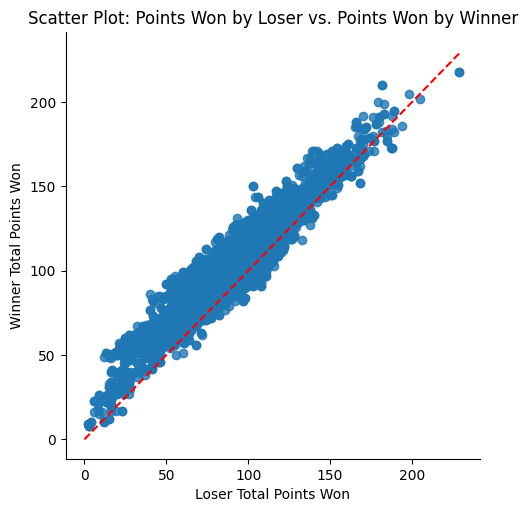

In [ ]:
sns.lmplot(x='loser_total_points_won', y='winner_total_points_won', data=combined_df, fit_reg=False)
plt.xlabel('Loser Total Points Won')
plt.ylabel('Winner Total Points Won')
plt.title('Scatter Plot: Points Won by Loser vs. Points Won by Winner')
plt.plot([0, 230], [0, 230], color='red', linestyle='--', label='y = x')
plt.show()

מסקנה מ2 גרפים אלה:

משתנה רציף + בדיד

ניצחון בנקודות של סרב ראשון ונקודות של סרב שני חשובות באותה מידה

בכל אחד בשביל לנצח צריך לנצח קצת יותר מהיריב

⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇

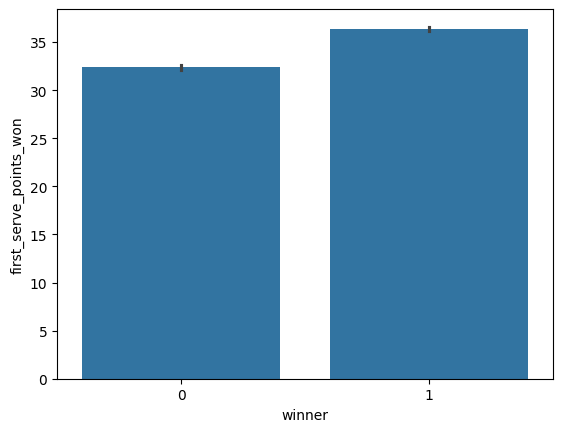

In [ ]:
sns.barplot(x='winner', y='first_serve_points_won', data=df3)

plt.show()

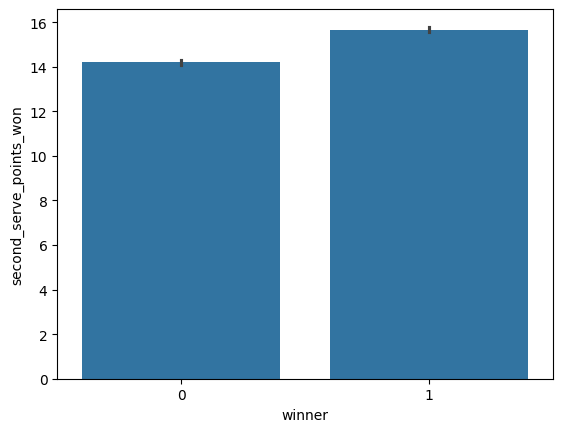

In [ ]:
sns.barplot(x='winner', y='second_serve_points_won', data=df3)

plt.show()

In [ ]:
print(df3.columns)


Index(['winner', 'match_duration', 'serve_rating', 'aces ', 'double_faults',
       'first_serves_in', 'first_serves_total', 'first_serve_points_won',
       'first_serve_points_total', 'second_serve_points_won',
       'second_serve_points_total', 'break_points_saved',
       'break_points_serve_total', 'service_games_played', 'return_rating',
       'first_serve_return_won', 'first_serve_return_total',
       'second_serve_return_won', 'second_serve_return_total',
       'break_points_converted', 'break_points_return_total',
       'return_games_played', 'service_points_won', 'service_points_total',
       'return_points_won', 'return_points_total', 'total_points_won',
       'total_points_total'],
      dtype='object')


מסקנה מגרף זה:

משתנה רציף + בדיד

מפסידים בדרך כלל מצילים יותר ברייק פוינטים ממנצחים

ניתן להסיק מכך שהמפסידים מגיעים ליותר מצבים שיש ליריביהם ברייק פוינט כי הם מפסידים להם

בשביל לנצח חשוב מאוד לא להביא ליריב ברייק פוינט, מכך ניתן להסיק שבשביל לנצח צריך לשלוט טוב בסרבים ולנצח נקודות חשובות בגיימים של סרב

⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇


<Axes: xlabel='break_points_saved', ylabel='Density'>

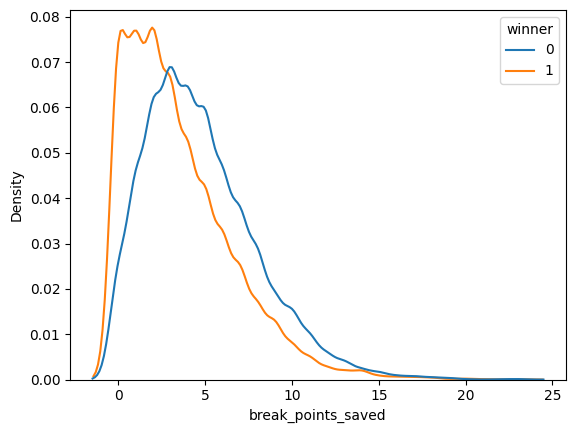

In [ ]:
sns.kdeplot(data=df3, x='break_points_saved', hue='winner')

<Axes: xlabel='winner_total_points_won', ylabel='Count'>

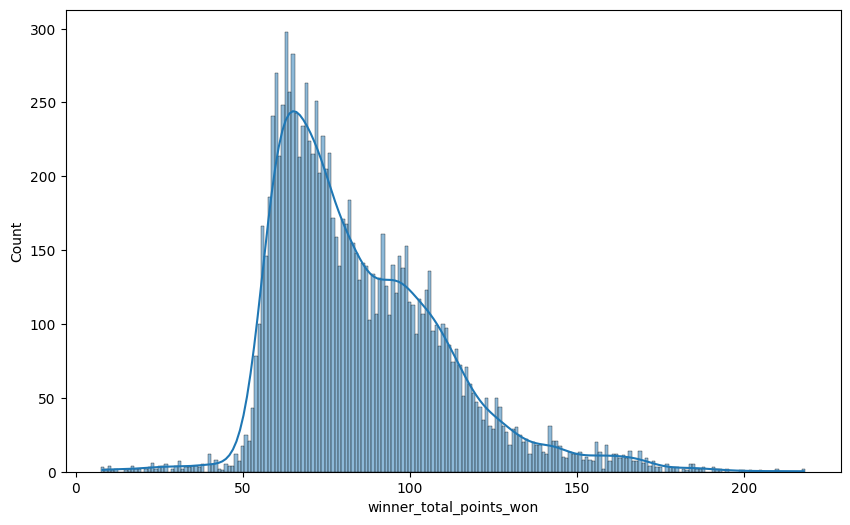

In [ ]:
plt.figure(figsize = (10,6))
sns.histplot(data=combined_df, x='winner_total_points_won', bins=10,kde=True)

<Axes: xlabel='loser_total_points_won', ylabel='Count'>

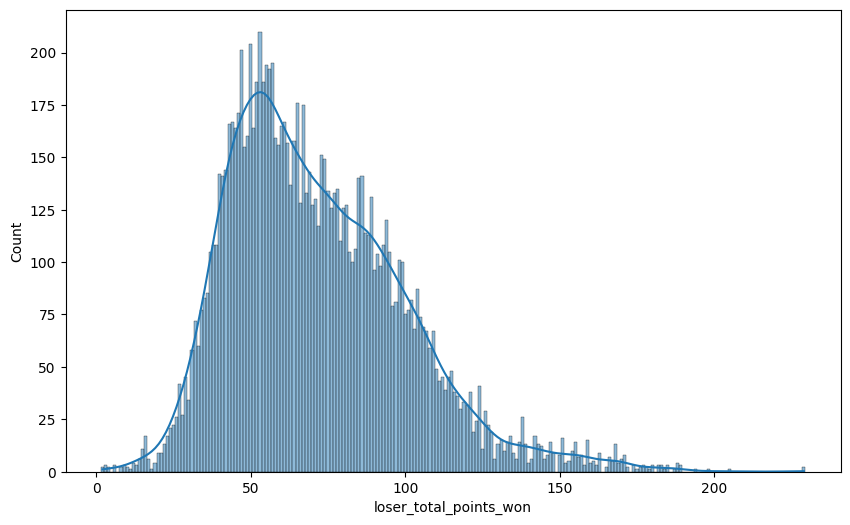

In [ ]:
plt.figure(figsize = (10,6))
sns.histplot(data=combined_df, x='loser_total_points_won', bins=10,kde=True)

In [ ]:
df3.head()

winner  match_duration  serve_rating  aces   double_faults  \
0       1              72           297      4              0   
1       0              72           213      1              5   
2       1              98           285      7              1   
3       0              98           265      5              4   
4       1              82           270      6              4   

   first_serves_in  first_serves_total  first_serve_points_won  \
0               38                  50                      27   
1               33                  55                      20   
2               44                  70                      30   
3               46                  70                      29   
4               36                  60                      29   

   first_serve_points_total  second_serve_points_won  ...  \
0                        38                        7  ...   
1                        33                        9  ...   
2                        44                       15  ...   
3                        46                       13  ...   
4                        36                       11  ...   

   second_serve_return_total  break_points_converted  \
0                         22                       4   
1                         12                       1   
2                         24                       2   
3                         26                       1   
4                         21                       4   

   break_points_return_total  return_games_played  service_points_won  \
0                          5                    9                  34   
1                          1                    9                  29   
2                          5                   11                  45   
3                          3                   11                  42   
4                          6                   10                  40   

   service_points_total  return_points_won  return_points_total  \
0                    50                 26                   55   
1                    55                 16                   50   
2                    70                 28                   70   
3                    70                 25                   70   
4                    60                 24                   56   

   total_points_won  total_points_total  
0                60                 105  
1                45                 105  
2                73                 140  
3                67                 140  
4                64                 116  

[5 rows x 28 columns]

<div dir = 'rtl'>

##מתאם נתונים

In [ ]:
df4 = df3

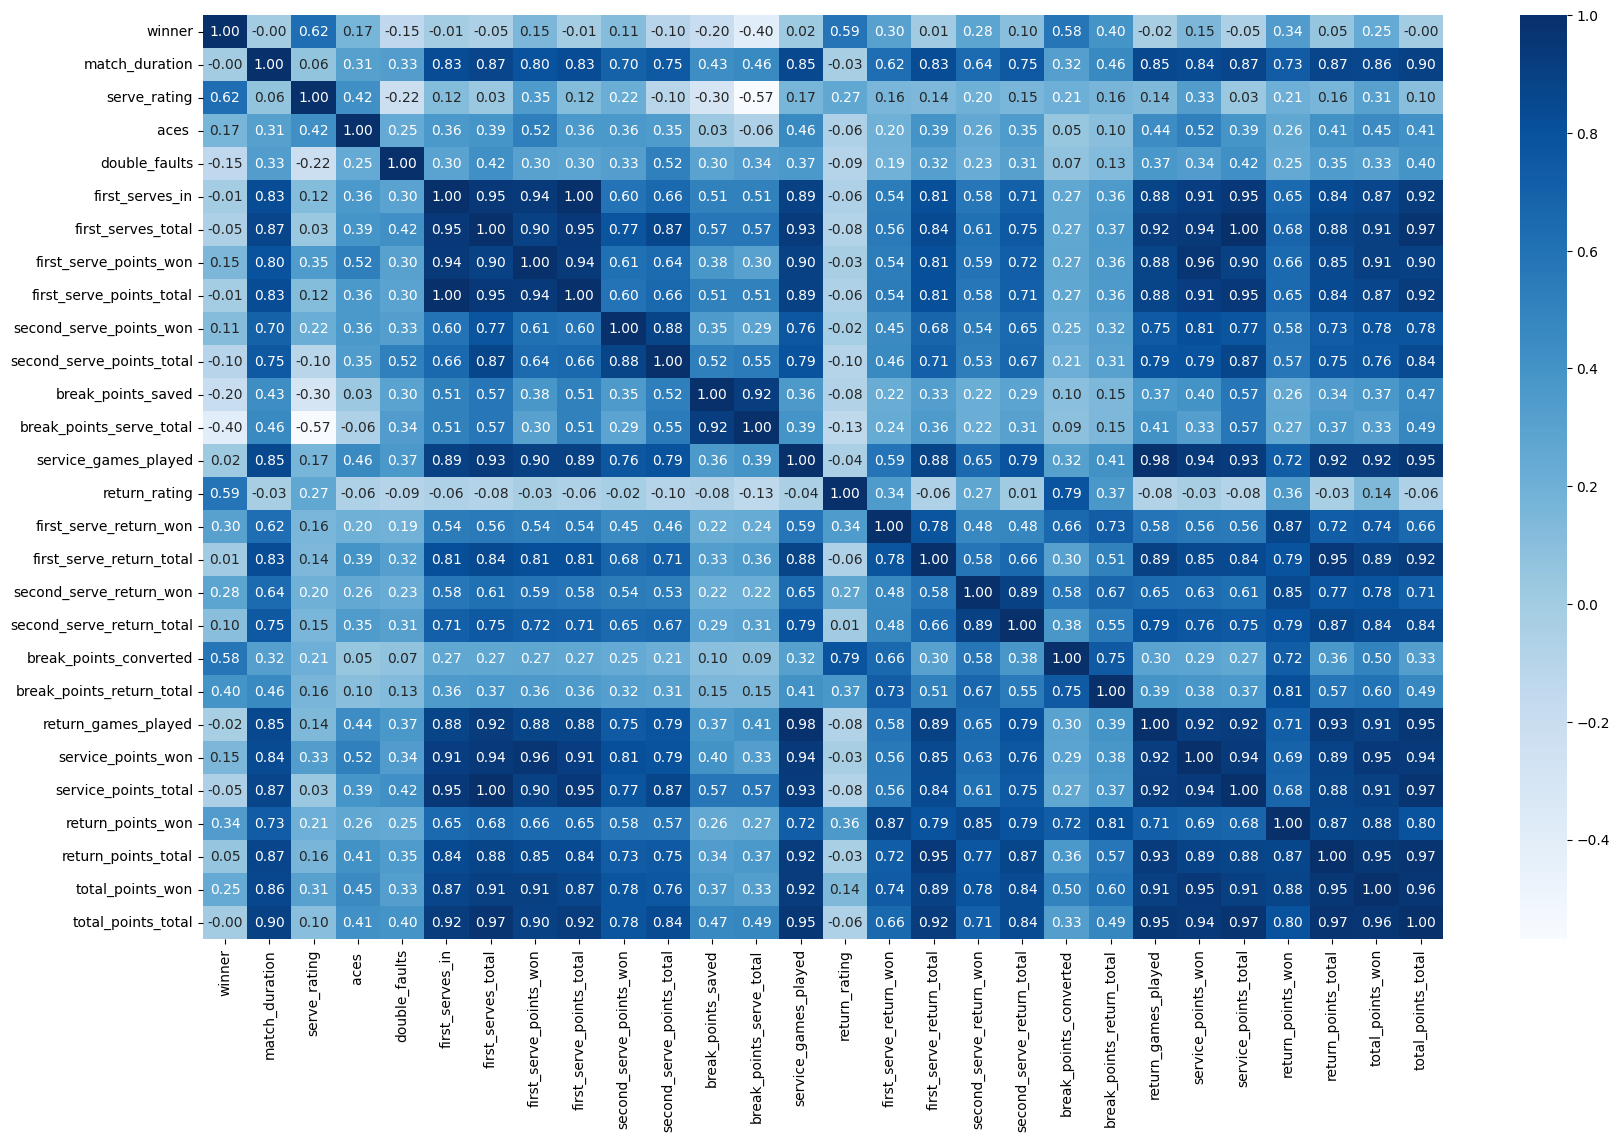

In [ ]:
plt.figure(figsize = (20,12))
corr = df3.corr()
sns.heatmap(corr,annot=True, cmap = "Blues",fmt='.2f');

In [ ]:
df3.corr()[['winner']].sort_values( 'winner', ascending=False)

winner
winner                     1.000000e+00
serve_rating               6.201065e-01
return_rating              5.892161e-01
break_points_converted     5.785681e-01
break_points_return_total  3.971601e-01
return_points_won          3.407506e-01
first_serve_return_won     3.036498e-01
second_serve_return_won    2.815666e-01
total_points_won           2.451105e-01
aces                       1.664769e-01
service_points_won         1.503279e-01
first_serve_points_won     1.487073e-01
second_serve_points_won    1.124242e-01
second_serve_return_total  1.000186e-01
return_points_total        5.016862e-02
service_games_played       2.487946e-02
first_serve_return_total   1.069302e-02
match_duration            -1.408851e-16
total_points_total        -3.769106e-16
first_serve_points_total  -1.069302e-02
first_serves_in           -1.069302e-02
return_games_played       -2.487946e-02
service_points_total      -5.016862e-02
first_serves_total        -5.016862e-02
second_serve_points_total -1.000186e-01
double_faults             -1.460632e-01
break_points_saved        -1.984550e-01
break_points_serve_total  -3.971601e-01

<div dir = 'rtl'>

#אימון

<div dir = 'rtl'>

##חלוקת מאגר הנתונים

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df2.drop([ 'winner'], axis=1) . to_numpy()
y = df2[ 'winner' ]. to_numpy()
print("start: ", X.shape, y.shape)
X_train11,X_test11,y_train,y_test= train_test_split(X,y,test_size=0.20, random_state=41)
print("train: ", X_train11.shape, y_train.shape)
print ("test1: " , X_test11.shape, y_test.shape)

start:  (22776, 27) (22776,)
train:  (18220, 27) (18220,)
test1:  (4556, 27) (4556,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_3 = KNeighborsClassifier(n_neighbors=3)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22776 entries, 0 to 22777
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   winner                     22776 non-null  int64 
 1   match_duration             22776 non-null  object
 2   serve_rating               22776 non-null  object
 3   aces                       22776 non-null  object
 4   double_faults              22776 non-null  object
 5   first_serves_in            22776 non-null  object
 6   first_serves_total         22776 non-null  object
 7   first_serve_points_won     22776 non-null  object
 8   first_serve_points_total   22776 non-null  object
 9   second_serve_points_won    22776 non-null  object
 10  second_serve_points_total  22776 non-null  object
 11  break_points_saved         22776 non-null  object
 12  break_points_serve_total   22776 non-null  object
 13  service_games_played       22776 non-null  object
 14  return_rati

In [ ]:
knn_3.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

<div dir = 'rtl'>

##אימון והערכת ביצועים

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier(n_neighbors = 12)
knn1.fit(X_train11, y_train)
knn1.score(X_test11, y_test)

0.9207638279192274

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
pred1=knn1.predict(X_test11)
confusion_matrix(y_test,pred1)

array([[2106,  188],
       [ 173, 2089]])

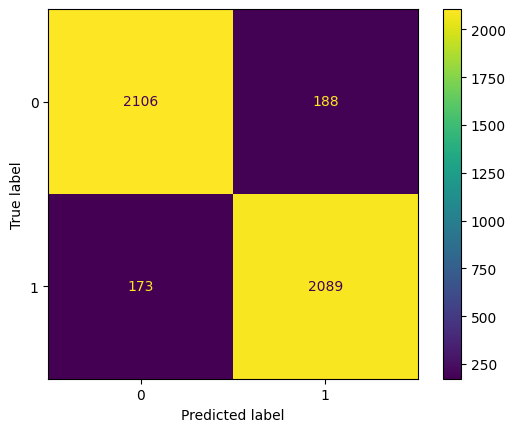

In [ ]:
cm = confusion_matrix(y_test, pred1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,pred1,digits=4))

              precision    recall  f1-score   support

           0     0.9241    0.9180    0.9211      2294
           1     0.9174    0.9235    0.9205      2262

    accuracy                         0.9208      4556
   macro avg     0.9208    0.9208    0.9208      4556
weighted avg     0.9208    0.9208    0.9208      4556



<div dir = 'rtl'>

## הורדת התוצאות כי לא ריאלי

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22776 entries, 0 to 22777
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   winner                     22776 non-null  int64 
 1   match_duration             22776 non-null  object
 2   serve_rating               22776 non-null  object
 3   aces                       22776 non-null  object
 4   double_faults              22776 non-null  object
 5   first_serves_in            22776 non-null  object
 6   first_serves_total         22776 non-null  object
 7   first_serve_points_won     22776 non-null  object
 8   first_serve_points_total   22776 non-null  object
 9   second_serve_points_won    22776 non-null  object
 10  second_serve_points_total  22776 non-null  object
 11  break_points_saved         22776 non-null  object
 12  break_points_serve_total   22776 non-null  object
 13  service_games_played       22776 non-null  object
 14  return_rati

In [ ]:
X = df2.drop(columns='winner')
y = df2['winner']
feature_names = X.columns.tolist()


In [ ]:
from sklearn.inspection import permutation_importance
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train11, y_train)
results = permutation_importance(knn, X_test11, y_test, n_repeats=10, random_state=42)

for i in results.importances_mean.argsort()[::-1]:
    print(f"{feature_names[i]}: {results.importances_mean[i]:.3f} +/- {results.importances_std[i]:.3f}")


serve_rating: 0.212 +/- 0.004
return_rating: 0.167 +/- 0.004
total_points_won: 0.051 +/- 0.003
total_points_total: 0.026 +/- 0.002
match_duration: 0.016 +/- 0.002
return_points_total: 0.008 +/- 0.002
return_points_won: 0.008 +/- 0.002
first_serve_return_total: 0.007 +/- 0.002
first_serves_in: 0.004 +/- 0.002
first_serve_points_total: 0.004 +/- 0.002
first_serve_return_won: 0.004 +/- 0.002
service_points_total: 0.004 +/- 0.002
first_serves_total: 0.004 +/- 0.002
service_points_won: 0.002 +/- 0.001
break_points_return_total: 0.002 +/- 0.001
second_serve_points_total: 0.001 +/- 0.001
first_serve_points_won: 0.001 +/- 0.001
break_points_saved: 0.001 +/- 0.001
break_points_serve_total: 0.000 +/- 0.001
return_games_played: 0.000 +/- 0.001
break_points_converted: 0.000 +/- 0.000
aces : -0.000 +/- 0.002
service_games_played: -0.001 +/- 0.001
second_serve_points_won: -0.001 +/- 0.001
double_faults: -0.001 +/- 0.001
second_serve_return_won: -0.003 +/- 0.002
second_serve_return_total: -0.005 +/- 

In [ ]:
df5 = df2

In [ ]:
df5.drop(['serve_rating','return_rating','total_points_won'],axis = 1, inplace = True)

In [ ]:
X = df5.drop([ 'winner'], axis=1) . to_numpy()
y = df5[ 'winner' ]. to_numpy()
print("start: ", X.shape, y.shape)
X_train12,X_test12,y_train2,y_test2= train_test_split(X,y,test_size=0.20, random_state=41)
print("train: ", X_train11.shape, y_train.shape)
print ("test1: " , X_test11.shape, y_test.shape)

start:  (22776, 24) (22776,)
train:  (18220, 27) (18220,)
test1:  (4556, 27) (4556,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn5 = KNeighborsClassifier(n_neighbors = 9)
knn5.fit(X_train12, y_train2)
knn5.score(X_test12, y_test2)

0.8931079894644425

In [ ]:
pred5=knn5.predict(X_test12)
confusion_matrix(y_test2,pred1)

array([[2106,  188],
       [ 173, 2089]])

In [ ]:
print(classification_report(y_test2,pred5,digits=4))

              precision    recall  f1-score   support

           0     0.8954    0.8919    0.8936      2294
           1     0.8908    0.8943    0.8926      2262

    accuracy                         0.8931      4556
   macro avg     0.8931    0.8931    0.8931      4556
weighted avg     0.8931    0.8931    0.8931      4556



<div dir = 'rtl'>

##בחירת היפר פרמטרים + אימות צולב

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, RobustScaler
from sklearn.model_selection import GridSearchCV
import time

In [ ]:
t0 = time.time ()
parameters = {
              'algorithm': ['ball_tree', 'kd_tree', 'brute'],
              'n_neighbors': [3,5,7,9],
              'weights' : ['uniform', 'distance']
            }
knn11 = GridSearchCV(KNeighborsClassifier(), parameters, cv=5)
knn11.fit(X_train12, y_train2)
cv_results = pd.DataFrame(knn11.cv_results_)
t1 = time.time()
print("time: {:.1f}".format(t1-t0))
cv_results.head(1)

time: 63.3


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.057115      0.003536         0.750212        0.040619   

  param_algorithm  param_n_neighbors param_weights  \
0       ball_tree                  3       uniform   

                                              params  split0_test_score  \
0  {'algorithm': 'ball_tree', 'n_neighbors': 3, '...           0.880077   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.877607           0.882272           0.877607           0.881998   

   mean_test_score  std_test_score  rank_test_score  
0         0.879912        0.002029               23

In [ ]:
knn11.best_params_

{'algorithm': 'brute', 'n_neighbors': 9, 'weights': 'distance'}

In [ ]:
knn1 = KNeighborsClassifier(
            algorithm = knn11.best_params_['algorithm'],
            n_neighbors = knn11.best_params_['n_neighbors'],
            weights = knn11.best_params_[ 'weights']
            )
knn1.fit(X_train12, y_train2)
knn1.score(X_test12, y_test2)

0.9451273046532046

In [ ]:
y_pred = knn1.predict(X_test12)

print(classification_report(y_test2, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      2294
           1       0.95      0.94      0.94      2262

    accuracy                           0.95      4556
   macro avg       0.95      0.95      0.95      4556
weighted avg       0.95      0.95      0.95      4556



<div dir = 'rtl'>

##בחירת נרמול

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, RobustScaler
from sklearn.model_selection import GridSearchCV
import time

In [ ]:
def dis_np(np1) :
  np2=np.zeros_like(np1)
  return np.linalg.norm(np1 - np2)

In [ ]:
pd.options.display.float_format = '{:,.4f}'.format
pd.DataFrame(X_train12).describe().transpose()

count  unique  top  freq
0   18220     467   85   182
1   18220      80    2  1419
2   18220      44    2  2389
3   18220     256   35   348
4   18220     371   62   240
5   18220     195   26   461
6   18220     256   35   348
7   18220      97   14   872
8   18220     171   24   489
9   18220      46    2  1682
10  18220      59    6  1141
11  18220      63   10  1765
12  18220     102   10   768
13  18220     257   35   328
14  18220     100   14   759
15  18220     171   24   495
16  18220      26    3  2184
17  18220      58    6  1127
18  18220      63   10  1753
19  18220     254   38   332
20  18220     371   62   240
21  18220     167   25   490
22  18220     373   62   236
23  18220     589  114   137

In [ ]:
#scaler = MinMaxScaler() # 0.9457857769973661
#scaler = StandardScaler() #0.9449078138718174
#scaler = RobustScaler() # 0.9457857769973661
scaler = Normalizer() # 0.9672958735733099
# fit and transfrom
X_train = scaler.fit_transform(X_train12)
X_test = scaler.transform(X_test12)
pd.options.display.float_format = '{:,.4f}'.format
pd.DataFrame(X_train11).describe().transpose()

knn2 = KNeighborsClassifier(
            algorithm = knn11.best_params_['algorithm'],
            n_neighbors = knn11.best_params_['n_neighbors'],
            weights = knn11.best_params_[ 'weights']
            )
knn1.fit(X_train, y_train2)
knn1.score(X_test, y_test2)

0.9672958735733099

<div dir = 'rtl'>

##איזון תגיות

In [ ]:
df5['winner'].value_counts()

winner
1    11388
0    11388
Name: count, dtype: int64

אין צורך כי התגיות כבר מאוזנות

<div dir = 'rtl'>

## התאמת יתר או תת התאמה

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,KFold, cross_validate
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split,KFold, cross_validate

k_list=[]
train_score=[]
test_score=[]

print('k\tTrain\tTest accuracy')

kf = KFold(n_splits=5, shuffle=True, random_state=41)

for k in range(1,55,2):
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_validate(knn,X,y,cv=kf,return_train_score=True)

  print('%d\t%.2f\t%.2f'%(k,scores['train_score'].mean(),scores['test_score'].mean()))

  k_list.append(k)
  train_score.append(scores['train_score'].mean())
  test_score.append(scores['test_score'].mean())

k	Train	Test accuracy
1	1.00	0.93
3	0.96	0.88
5	0.93	0.89
7	0.93	0.89
9	0.92	0.89
11	0.92	0.89


KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(k_list[::-1],[100*(1-t) for t in train_score],label='Train error')
plt.plot(k_list[::-1],[100*(1-t) for t in test_score],label='Validation error')
plt.legend()
plt.xlabel('Model complexity')
plt.ylabel('Classification error (%)')
plt.grid()
labels = [item.get_text() for item in plt.gca().get_xticklabels()]
labels[1] = '                      Low complexity (K=55)'
labels[-2] = '                 High complexity (K=1)'

plt.gca().set_xticklabels(labels);


<div dir = 'rtl'>

המסקנות מהתוצאות לגבי התאמת יתר הן:

1. **התאמת יתר בערכים נמוכים של \( k \)**: עבור \( k = 1 \), הדיוק באימון הוא 100% בעוד שהדיוק בבדיקה הוא 93%, מה שמעיד על התאמת יתר.
2. **שיפור ויציבות בערכים גבוהים יותר של \( k \)**: הדיוק בבדיקה משתפר ומתייצב על 90% כאשר \( k \) גדול מ-13, בעוד שהדיוק באימון יורד במקצת, מה שמצביע על הפחתת התאמת יתר.
3. **בחירת \( k \) אופטימלית**: \( k = 13 \) ומעלה נראים כערכים אופטימליים, שכן הם משיגים דיוק יציב בבדיקה של 90%.

בגדול, הערכים הגבוהים יותר של \( k \) מונעים התאמת יתר ומביאים לדיוק יציב ואופטימלי.

In [ ]:
knn17 = KNeighborsClassifier(n_neighbors = 17)
knn17.fit(X_train12, y_train2)
knn17.score(X_test12, y_test2)

In [ ]:
y_pred = knn17.predict(X_test12)

print(classification_report(y_test2, y_pred))

<div dir = 'rtl'>

##אלגוריתם נוסף - svm

Winner or loser - SVM Confusion Matrix
[[2201   93]
 [ 109 2153]]


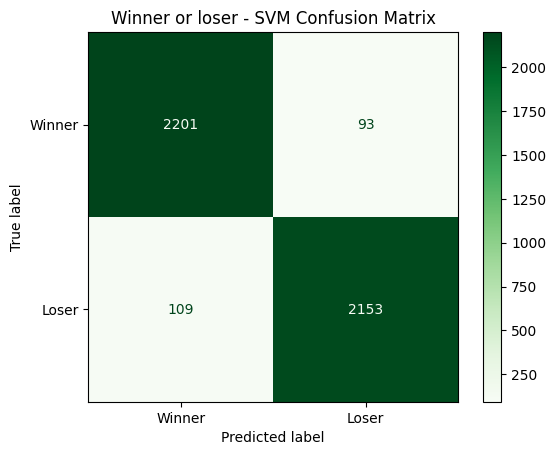

              precision    recall  f1-score   support

      Winner       0.95      0.96      0.96      2294
       Loser       0.96      0.95      0.96      2262

    accuracy                           0.96      4556
   macro avg       0.96      0.96      0.96      4556
weighted avg       0.96      0.96      0.96      4556



In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear')
svm.fit(X_train12, y_train2)
classifier = svm
target_names = ['Winner', 'Loser']

y_pred =  svm.predict(X_test12)
title = "Winner or loser - SVM Confusion Matrix"
print(title)
print(confusion_matrix(y_test2,y_pred))

from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test12,
        y_test2,
        display_labels=target_names,
        cmap=plt.cm.Greens,
    )
disp.ax_.set_title(title)
plt.show()

from sklearn.metrics import accuracy_score
accuracy_score(y_test2, y_pred)

from sklearn.metrics import precision_score
precision_score(y_test2, y_pred, average=None)

from sklearn.metrics import classification_report
print(classification_report(y_test2, y_pred, target_names=target_names))

<div dir = 'rtl'>

#סיכום העבודה

---

בחירת הנושא:

לא הייתה לי דילמה קשה בבחירת הנושא כי ישר בחרתי את מה שאני מאוד אוהב -  טניס. אני משחק טניס וזה מאוד עניין אותי איך לחזות ניצחונות וקיוויתי שאוכל להשתמש בתוצאות שלי בעצמי.

הנושא הוא חזיית ניצחון של משחקי טניס

---

השגת הנתונים:

תחילה ניסיתי במשך שעות למצוא נתונים שיעזרו לי באינטרנט אך לא הצלחתי למצוא, החלטתי לא לוותר כי התחברתי מאוד לנושא ולהשיג את הנתונים בעצמי.

 בשביל להשיג את הנתונים לקחתי מידע מהאתר ATP TOUR בעזרת סקרייפינג

 בסקרייפינג בהתחלה השתמשתי בספריות lxml selenium   ולאחר מכן נתקלתי בבעיה עם האתר ובשביל לפתור את הבעיה השתמשתי בchromedriver

לאחר מכן שילבתי טבלאות נתונים של 3 שנים יחד 2020 ,2021, 2022

---

ניקוי הנתונים:

הנתונים שלי היו בנויים כך: בכל שורה היה משחק אחד ובשורה היו נתונים של המפסיד ושל המנצח.

הורדתי את העמודות הלא חשובות בנתונים למשל: שם הטורניר, קישור למשחק, קישור לשחקן ועוד.

נתקלתי בבעיה ולא ידעתי איך להפוך את הנתונים שלי לברי אימון, לאחר חשיבה רבה זאת הדרך שהשתמשתי בה:

בשביל שיהיה אפשר לאמן את הנתונים יצרתי שורה חדשה לאחר כל שורה קיימת ,הפרדתי את הנתונים של המנצח והמפסיד והכנסתי אותם לשורות שונות והוספתי עמודה חדשה של winner שאם השחקן בשורה זאת הוא המנצח אז כתוב 1 ואם הוא המפסיד אז כתוב 0.

---

חקר נתונים:

בתחילת חקר הנתונים השתמשתי בפונקציה groupby mean, הפונקציה הזאת מחשבת ממוצע של הערכים בעמודות שבטבלה לפי עמודה אחת, למשל מראה ממוצע של ניצחון(בין 0 ל1) למספר נקודות שהשחק ניצח.

הסקתי מספר מסקנות משימושה:

 ככל ששחקן חובט יותר אייסים(הגשה ראשונה שהשחקן היריב לא הצליח לגעת בכדור) כך יש לו סיכוי גבוה יותר לניצחון.

בשביל לנצח הכי חשוב לנצח את הנקודות המכריעות ולא מספיק רק להגיע אליהן

לאחר מכן עשיתי ויזואליזציה של הנתונים בעזרת seaborn הסקתי מהגרפים שיצאו מספר מסקנות:

בשביל לנצח לא בהכרח צריך לנצח יותר נקודות מהיריב, לפעמים המפסיד מנצח יותר נקודות מהיריב. הנקודות המכריעות הם הכי חשובות לניצחון.

ניצחון בנקודות של סרב ראשון ונקודות של סרב שני חשובות באותה מידה,
בכל אחד בשביל לנצח צריך לנצח קצת יותר מהיריב.

בשביל לנצח חשוב מאוד לא להביא ליריב ברייק פוינט, בשביל לנצח צריך לשלוט טוב בסרבים ולנצח נקודות חשובות בגיימים של סרב.

לאחר מכן עשיתי מתאם נתונים (מדד סטטי המבטא את הקשר בין שני משתנים) שעזר לי מאוד בהבנת הנתונים לעומק.

---

אימון:

חלוקת מאגר נתונים לסט אימון וסט בדיקה בשביל לאמן את מודל KNN על חלק מהנתונים ולבדוק את ביצועיו על חלק נפרד שלא נכלל באימון, כדי להעריך את יכולת ההכללה שלו. ביצעתי זאת עם הפונקציה train_test_split של ספריית scikit-learn. חילקתי ביחס של 80 ו20 אחוז, 80 לאימון ו20 לבדיקה.

אלה התוצאות מהאימון הראשונה באלגוריתם knn עם n-neighbors של 12.


               support  precision    recall  f1-score

           0     0.9241    0.9180    0.9211      2294
           1     0.9174    0.9235    0.9205      2262

    accuracy                         0.9208      4556
    macro avg     0.9208    0.9208    0.9208      4556
    weighted avg     0.9208    0.9208    0.9208      4556


התוצאות יצאו טובות מדי אז בדקתי איזה נתון משפיע הכי הרבה על התוצאות.

עשיתי זאת בעזרת קוד מאמן מודל KNN על נתוני האימון ובודק את חשיבות התכונות באמצעות permutation importance. הוא מחשב את השינוי בדיוק המודל כאשר משנים ערכי תכונה מסוימת, ומדפיס את חשיבות כל תכונה בסדר יורד עם הממוצע והסטיית התקן של השינוי. כך ניתן להבין אילו תכונות משפיעות יותר על ביצועי המודל.

  אלה הנתונים שמשפיעים הכי הרבה על המודל והתוצאות שיצאו:

serve_rating: 0.212 +/- 0.004

return_rating: 0.167 +/- 0.004

total_points_won: 0.051 +/- 0.003

הורדתי את עמודות אלה בשביל שיהיו תוצאות ריאליסטיות יותר

אלה התוצאות שיצאו לאחר הורדת עמודות אלה:

                support  precision    recall  f1-score  

           0     0.8954    0.8919    0.8936      2294
           1     0.8908    0.8943    0.8926      2262

    accuracy                         0.8931      4556
    macro avg     0.8931    0.8931    0.8931      4556
    weighted avg     0.8931    0.8931    0.8931      4556

דיוק המודל ירד ב2 אחוז

לאחר מכן השתמשתי בקוד המבצע חיפוש רשת (GridSearchCV) על מודל KNN עם פרמטרים שונים כדי למצוא את השילוב הטוב ביותר באמצעות אימות צולב (cross-validation). הוא מנסה כל שילוב של פרמטרים מ-parameters, מאמן את המודל על נתוני האימון, ושומר את התוצאות ב-DataFrame. לבסוף, הוא מדפיס את הזמן שלקח לבצע את החיפוש ומציג את התוצאה הראשונה של החיפוש.

תוצאות של הפרמטרים הכי טובים:

                support  precision    recall  f1-score  

           0       0.94      0.95      0.95      2294
           1       0.95      0.94      0.94      2262

    accuracy                           0.95      4556
    macro avg       0.95      0.95      0.95      4556
    weighted avg       0.95      0.95      0.95      4556

בדיקת הסקלר עם התוצאות הכי טובות. הסקלר שנבחר מתאים את הנתונים (מנרמל אותם) לפני אימון מודל ה-KNN. חיפוש רשת (GridSearchCV) מתבצע למציאת הפרמטרים הטובים ביותר למודל ה-KNN, ולאחר מכן המודל מאומן עם הפרמטרים האלו על הנתונים המותאמים. לבסוף, המודל נבדק והדיוק שלו על סט הבדיקה מוצג. הסקלר עם הדיוק הגבוה ביותר היה המנרמל.

לא נצרך איזון תגיות כי יש בנתונים אותו מספר מנצחים ומפסידים.

התאמת יתר לבדיקת הk (n-neighbor) האופטימלי

המסקנות מהתוצאות לגבי התאמת יתר הן:

1. **התאמת יתר בערכים נמוכים של \( k \)**: עבור \( k = 1 \), הדיוק באימון הוא 100% בעוד שהדיוק בבדיקה הוא 93%, מה שמעיד על התאמת יתר.
2. **שיפור ויציבות בערכים גבוהים יותר של \( k \)**: הדיוק בבדיקה משתפר ומתייצב על 90% כאשר \( k \) גדול מ-13, בעוד שהדיוק באימון יורד במקצת, מה שמצביע על הפחתת התאמת יתר.
3. **בחירת \( k \) אופטימלית**: \( k = 13 \) ומעלה נראים כערכים אופטימליים, שכן הם משיגים דיוק יציב בבדיקה של 90%.

בגדול, הערכים הגבוהים יותר של \( k \) מונעים התאמת יתר ומביאים לדיוק יציב ואופטימלי.

תוצאות לערכי k גדולים מ13:

                support  precision    recall  f1-score  

           0       0.90      0.89      0.90      2294
           1       0.89      0.90      0.90      2262

    accuracy                           0.90      4556
    macro avg       0.90      0.90      0.90      4556
    weighted avg       0.90      0.90      0.90      4556


אלגוריתם נוסף - svm - תוצאות:

    precision    recall  f1-score    support

    Winner       0.95      0.96      0.96      2294
    Loser       0.96      0.95      0.96      2262

    accuracy                           0.96      4556
    macro avg       0.96      0.96      0.96      4556
    weighted avg       0.96      0.96      0.96      4556

תוצאות יותר טובות מהאלגוריתם knn


<div dir = 'rtl'>

#רפלקציה

---

בזמן עשיית הפרויקט הצטרכתי לעמוד מול מכשולים רבים.

 בהתחלה הייתי צריך למצוא נושא לעסוק בוא. לא הייתה לי דילמה קשה, ישר עלה לי הרעיון לחזות ניצחון או הפסד במשחקי טניס. כי אני מאוד אוהב טניס ונשארתי עם נושא זה עד הסוף.

 לא מצאתי נתונים מוכנים של משחקי טניס באינטרנט אז החלטתי להשיג אותם בעצמי. הסקרייפינג שעשיתי לאתר של משחקי הטניס לימד אותי רבות על שיטות להשגת מידע ועל האינטרנט. מידע זה יעזור לי מאוד בעתיד ובהמשך דרכי. נתקלתי בבעיות רבות בזמן הסקרייפינג אך לא ויתרתי אף פעם אפילו כשהיו רגעים שהכל היה נראה אבוד, נזכרתי עד כמה הנושא הזה חשוב לי ועל זה שכל בעיה היא ניתנת לפתירה. למדתי רבות מתהליך זה על פתרון בעיות ועבירת מכשולים. גם גידלתי אופי של אי ויתור גם כשהמצב נראה אבוד ואי פתיר.

 במהלך העבודה רכשתי מיומנויות רבות חדשות שלא היו לי לפני כן. למדתי כיצד לחפש מידע באינטרנט בכוחות עצמי ולרכוש ידע חדש שלא היה לי בעבר, ועבירת מכשולים בעצמי. למשל למדתי לעבוד עם ספריות רבות בפייתון, לחקור נתונים, לאמן נתונים, עבודה עם אלגוריתמים ושיפורם ועוד. הבנתי איך להסיק מסקנות בעצמי ולהתמודד עם בעיות באופן עצמאי, כולל התמודדות עם קוד שלא עובד ולמידה מהטעויות שלי. בנוסף, כתיבת הפרויקט הייתה חוויה מאתגרת של עמידה בזמנים ומילוי דרישות פרויקט, דבר שטרם חוויתי. עבורי, כתיבת הפרויקט הייתה התנסות מעשית משמעותית שתורמת לעתידי. תהליך הלמידה בפרויקט הקנה לי כישורים ותכונות חדשות שישמשו אותי בהמשך הדרך. נהניתי מאוד ללמוד את החומר ולהתנסות בו כחלק מפרויקט עצמאי.

בסך הכול, נהניתי מאוד מביצוע הפרויקט. למדתי המון על סקרייפינג, למידת מכונה ועל התהליך המלא לבניית מודל, החל מחיפוש נתונים ועד לעבודה עם מחברת Colab.